# Intermediate Mini-Project
by A4Ayub Data Science Labs (http://www.a4ayub.me/)

### Problem Statement

Illustrate what has been covered in class:

1. Descriptive Statistics
2. Inferential Statistics 
3. Visualisation
4. Modelling
5. Prediction
6. Intepretation of Results

By **Predicting which product (PROD_CODE_40) a customer is most likely to buy**

<font color="red">**Please take note that the illustrations in this notebook is NOT for results/accuracy but for explaining the various concepts**</font>

### Data Description

<font color="red">**This data is proprietory and cannot be shared to anyone who is NOT attending A4Ayub Data Science Labs.!**</font>

Each row in the dataset corresponds to one unique product in a basket (e.g. if there are three occurences of the same product in that basket, it will have one row for the product in that basket, with quantity equal to three)

The file has the below structure:

| Column Name | Description | Type | Sample Values |
| --- | --- | --- | --- |
| shop_week | Identifies the week of the basket | Char | Format is YYYYWW where the first 4 characters identify the fiscal year and the other two characters identify the specific week within the year (e.g. 200735). Being the fiscal year, the first week doesn’t start in January.  (See time.csv file for start/end dates of each week) |
| shop_date | Date when shopping has been made. Date is specified in the yyyymmdd format | Char | 20060413, 20060412 |
| shop_weekday | Identifies the day of the week | Num | 1=Sunday, 2=Monday, …, 7=Saturday |
| shop_hour | Hour slot of the shopping | Num | 0=00:00-00:59, 1=01:00-01:59, …23=23:00-23:59 |
| Quantity | Number of items of the same product bought in this basket | Num | Integer number |
| spend | Spend associated to the items bought | Num | Number with two decimal digits |
| prod_code | Product Code | Char | PRD0900001, PRD0900003 |
| prod_code_10 | Product Hierarchy Level 10 Code | Char | CL00072, CL00144 |
| prod_code_20 | Product Hierarchy Level 20 Code | Char | DEP00021, DEP00051 |
| prod_code_30 | Product Hierarchy Level 30 Code | Char | G00007, G00015 |
| prod_code_40 | Product Hierarchy Level 40 Code | Char | D00002, D00003 |
| cust_code | Customer Code | Char | CUST0000001624, CUST0000001912 |
| cust_price_sensitivity | Customer’s Price Sensitivity | Char | LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified |
| cust_lifestage | Customer’s Lifestage | Char | YA=Young Adults, OA=Older Adults, YF=Young Families, OF=Older Families, PE=Pensioners, OT=Other, XX=unclassified |
| basket_id | Basket ID. All items in a basket share the same basket_id value. | Num | 994100100000020, 994100100000344 |
| basket_size | Basket size | Char | L=Large, M=Medium, S=Small |
| basket_price_sensitivity | Basket price sensitivity  | Char | LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified |
| basket_type | Basket type | Char | Small Shop, Top Up, Full Shop, XX |
| basket_dominant_mission | Shopping dominant mission | Char | Fresh, Grocery, Mixed, Non Food, XX |
| store_code | Store Code | Char | STORE00001, STORE00002 |
| store_format | Format of the Store | Char | LS, MS, SS, XLS |
| store_region | Region the store belongs to | Char | E02, W01, E01, N03 |


### Workbench

#### Importing the required libraries

In [959]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import seaborn as sns

# Import the warnings
import warnings

# Import statsmodels
import statsmodels.formula.api as smf

# Import RMSE
from statsmodels.tools.eval_measures import rmse

# Imort Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the metrics
from sklearn import metrics

# configuration settings
%matplotlib inline 
sns.set(color_codes=True)
warnings.filterwarnings('ignore') ## Surpress the warnings
pd.options.display.max_columns = None # Display all columns

# For Stats
import scipy.stats as stats
import pandas_profiling as pp

# Other Tools
import matplotlib
import math
from collections import Counter
from numpy import log


#### Load the data into a dataframe

In [825]:
# load the data into a dataframe called supermarket_till_transactions_df
supermarket_till_transactions_df = pd.read_csv("../data/supermarket_till_transactions.csv",parse_dates=["SHOP_DATE"])

In [826]:
# view the top five records
supermarket_till_transactions_df.head(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,2006-04-13,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,D00001,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
1,200607,2006-04-12,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,D00002,CUST0000634693,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200607,2006-04-13,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,D00003,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,200607,2006-04-12,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,D00001,CUST0000634693,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
4,200607,2006-04-13,5,20,1,334,PRD0902064,CL00073,DEP00021,G00007,D00002,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02


### Exploration of the Target Variable

#### 1. Checking on the value_counts

The objective here is to be able to learn more (visually) about the target variable, e.g. over the period, how many of each has been purchased over time, are they purchased on relatively the same rate, does the purchase of one prod_code influence or drive the purchase of the other over an extended period of time e.t.c

In [827]:
supermarket_till_transactions_df["PROD_CODE_40"].value_counts()

D00002    58
D00003    27
D00005    17
D00001     9
D00008     8
Name: PROD_CODE_40, dtype: int64

The above can also be represented in:
1. A Pie-Chart
2. Bar Chart

With the variations such as **How does the purchase of PROD_CODE_40 vary with**
1. SHOP_DATE
2. SHOP_WEEKDAY
3. SHOP_HOUR
4. QUANTITY
5. SPEND
6. CUST_PRICE_SENSITIVITY
7. CUST_LIFESTAGE
8. BASKET_SIZE
9. BASKET_PRICE_SENSITIVITY
10. BASKET_TYPE
11. BASKET_DOMINANT_MISSION
12. STORE_CODE
13. STORE_FORMAT
14. STORE_REGION

In [828]:
PROD_CODE_40_df = supermarket_till_transactions_df["PROD_CODE_40"]
.value_counts().rename_axis("PROD_CODE_40").reset_index(name="COUNT")
PROD_CODE_40_df

,PROD_CODE_40,COUNT
0,D00002,58
1,D00003,27
2,D00005,17
3,D00001,9
4,D00008,8


<BarContainer object of 5 artists>

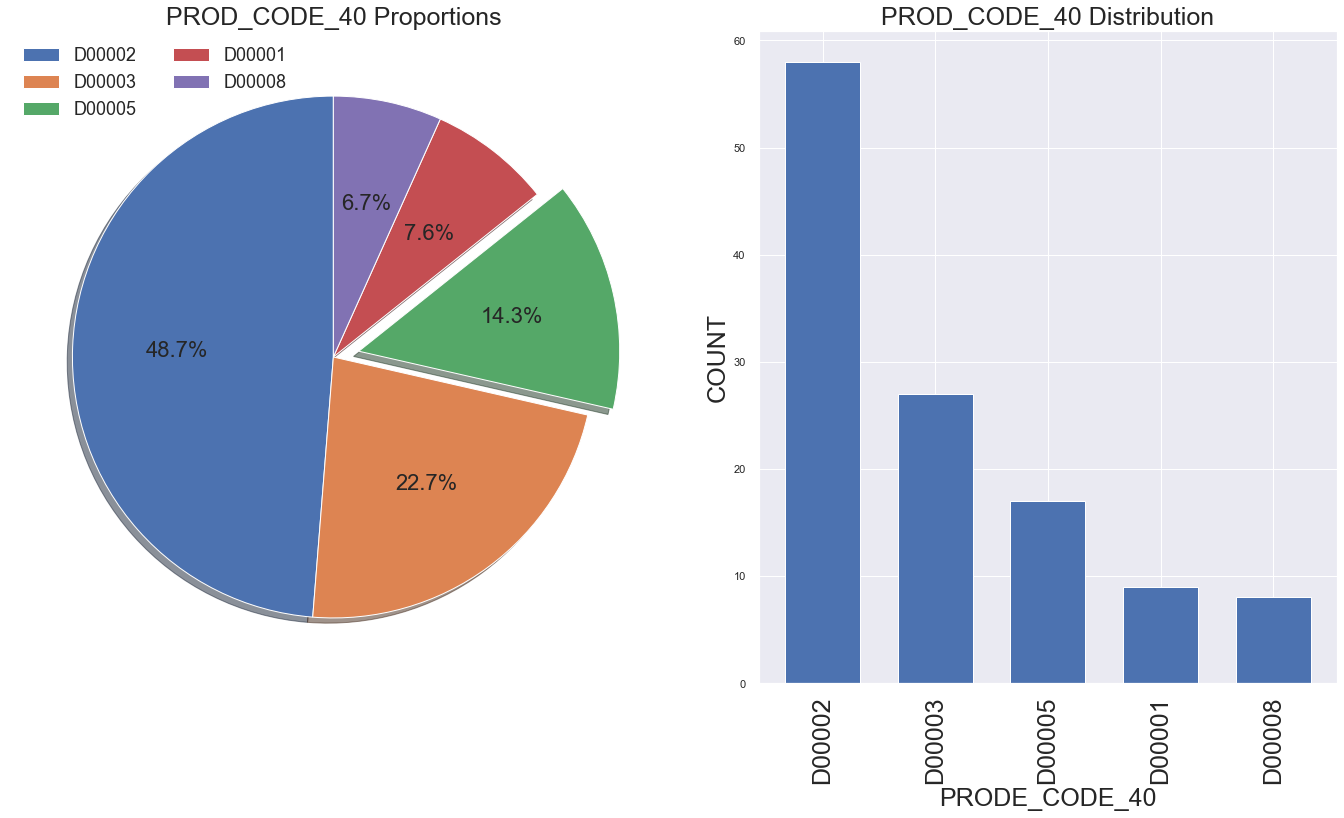

In [829]:
#Create a the top level element for all the plot elements by defining its width of 25 and height of 12
fig = plt.figure(figsize=(25,12)) 

# Define a gridspec which will specify the geometry within which a subpot will be configured. 
# This will have 6 rows and 7 columns
gs = gridspec.GridSpec(6,7)

# In the above gridSpec we will have two columns: One to display the pie-chart and the other to display the bar chart

# Define the subplot where you will have the pie chart
pie_subplot = plt.subplot(gs[:, :-3]) # From the Top to Last Row; From First Column to Fourth Column

# define the subplot where you will have the bar chart
bar_subplot = plt.subplot(gs[:, 4:])

# Draw the pie Chart
pie_labels = "D00002", "D00003", "D00005", "D00001", "D00008"
pie_explode = (0,0,0.1,0,0)
pie_subplot.set_title(label='PROD_CODE_40 Proportions', fontdict={'fontsize': 25})
pie_subplot.pie(
    PROD_CODE_40_df["COUNT"],
    explode=pie_explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    textprops={"fontsize":22}
)
pie_subplot.legend(pie_labels,loc=0,fontsize=18,ncol=2)


# Draw the bar chart
bar_list     = PROD_CODE_40_df["PROD_CODE_40"]
bar_count    = PROD_CODE_40_df["COUNT"]
index_values = np.arange(len(bar_list))
width = 1/1.5

bar_subplot.set_title(label='PROD_CODE_40 Distribution', fontdict={'fontsize': 25})
bar_subplot.set_xlabel(xlabel="PRODE_CODE_40",fontdict={'fontsize':25})
bar_subplot.set_ylabel(ylabel="COUNT",fontdict={'fontsize':25})
bar_subplot.set_xticklabels(bar_list,rotation="vertical",fontdict={'fontsize':25})
bar_subplot.bar(bar_list,bar_count,width)



From the distribution bar graph it indicates a positive skewness and thus we need to confirm whether or note the target variable is balanced. We can use Shannon Entropy to measure balance (https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance)

![](../../images/shannon-entropy-to-measure-dataset-imbalance.PNG)

In [830]:
def balance_calc(data, unit='natural'):
    base = {
        'shannon' : 2.,
        'natural' : math.exp(1),
        'hartley' : 10.
    }

    if len(data) <= 1:
        return 0

    counts = Counter()

    for d in data:
        counts[d] += 1

    ent = 0

    probs = [float(c) / len(data) for c in counts.values()]
    for p in probs:
        if p > 0.:
            ent -= p * math.log(p, base[unit])

    return ent/math.log(len(data))

In [831]:
balance_calc(supermarket_till_transactions_df["PROD_CODE_40"],'shannon')

0.404986642698677

<font color="red">**A value tending towards 0 indicates it is imbalanced and therefore needs to be addressed using any one of the imbalance handling techniques.**</font>

In [832]:
prod_code_40_by_shopping_df = supermarket_till_transactions_df[["PROD_CODE_40","SHOP_DATE","SHOP_WEEKDAY","SHOP_HOUR","QUANTITY","SPEND"]]
prod_code_40_by_shopping_df.sample(5)

,PROD_CODE_40,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND
43,D00005,2006-04-13,5,8,1,226
104,D00005,2006-04-12,4,12,3,432
39,D00005,2006-04-13,5,8,3,243
68,D00002,2006-04-12,4,20,1,129
83,D00002,2006-04-12,4,13,1,32


In [833]:
prod_code_40_purchases_by_date_quantity_df = prod_code_40_by_shopping_df[["PROD_CODE_40","SHOP_DATE","QUANTITY"]]
prod_code_40_purchases_by_date_df = prod_code_40_purchases_by_date_quantity_df.groupby(["PROD_CODE_40","SHOP_DATE"]).sum()
                                .reset_index()
prod_code_40_purchases_by_date_df.sample(5)

,PROD_CODE_40,SHOP_DATE,QUANTITY
14,D00003,2006-04-14,5
6,D00002,2006-04-11,3
8,D00002,2006-04-13,17
7,D00002,2006-04-12,36
20,D00008,2006-04-10,9


In [834]:
prod_code_40_by_spend_df = prod_code_40_by_shopping_df[["PROD_CODE_40","SHOP_DATE","SPEND"]]

# show and example
prod_code_40_by_shopping_df[prod_code_40_by_shopping_df["PROD_CODE_40"] == "D00008"]

,PROD_CODE_40,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND
48,D00008,2006-04-10,2,9,1,456
58,D00008,2006-04-10,2,9,1,1406
60,D00008,2006-04-10,2,9,4,1820
62,D00008,2006-04-14,6,8,1,1219
114,D00008,2006-04-10,2,10,3,729
115,D00008,2006-04-14,6,19,1,485
116,D00008,2006-04-14,6,19,1,450
118,D00008,2006-04-14,6,19,1,499


In [835]:
prod_code_40_purchases_by_date_spend_df = prod_code_40_by_shopping_df[["PROD_CODE_40","SHOP_DATE","SPEND"]]
prod_code_40_purchases_by_date_spending_df = prod_code_40_purchases_by_date_spend_df.groupby(["PROD_CODE_40","SHOP_DATE"])
                                                    .sum().reset_index()
prod_code_40_purchases_by_date_spending_df.sample(5)

,PROD_CODE_40,SHOP_DATE,SPEND
8,D00002,2006-04-13,1965
9,D00002,2006-04-14,1720
12,D00003,2006-04-12,562
18,D00005,2006-04-13,1034
0,D00001,2006-04-10,294


In [836]:
#prod_code_40_spend_by_date_df = prod_code_40_by_spend_df.groupby(["PROD_CODE_40","SHOP_DATE"]).sum().reset_index()
#prod_code_40_spend_by_date_df.sample(5)

In [968]:
d0001_dates_df = prod_code_40_purchases_by_date_df[prod_code_40_purchases_by_date_df["PROD_CODE_40"] == "D00001"]
d0002_dates_df = prod_code_40_purchases_by_date_df[prod_code_40_purchases_by_date_df["PROD_CODE_40"] == "D00002"]
d0003_dates_df = prod_code_40_purchases_by_date_df[prod_code_40_purchases_by_date_df["PROD_CODE_40"] == "D00003"]
d0005_dates_df = prod_code_40_purchases_by_date_df[prod_code_40_purchases_by_date_df["PROD_CODE_40"] == "D00005"]
d0008_dates_df = prod_code_40_purchases_by_date_df[prod_code_40_purchases_by_date_df["PROD_CODE_40"] == "D00008"]

# By SPEND
d0001_spend_dates_df = prod_code_40_purchases_by_date_spending_df[prod_code_40_purchases_by_date_spending_df["PROD_CODE_40"] 
                                                                  == "D00001"]
d0002_spend_dates_df = prod_code_40_purchases_by_date_spending_df[prod_code_40_purchases_by_date_spending_df["PROD_CODE_40"] 
                                                                  == "D00002"]
d0003_spend_dates_df = prod_code_40_purchases_by_date_spending_df[prod_code_40_purchases_by_date_spending_df["PROD_CODE_40"] 
                                                                  == "D00003"]
d0005_spend_dates_df = prod_code_40_purchases_by_date_spending_df[prod_code_40_purchases_by_date_spending_df["PROD_CODE_40"] 
                                                                  == "D00005"]
d0008_spend_dates_df = prod_code_40_purchases_by_date_spending_df[prod_code_40_purchases_by_date_spending_df["PROD_CODE_40"] 
                                                                  == "D00008"]


In [838]:
sorted_d0001_dates_df = d0001_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0002_dates_df = d0002_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0003_dates_df = d0003_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0005_dates_df = d0005_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0008_dates_df = d0008_dates_df.sort_values(by=["SHOP_DATE"])

# By SPEND
sorted_d0001_spend_dates_df = d0001_spend_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0002_spend_dates_df = d0002_spend_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0003_spend_dates_df = d0003_spend_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0005_spend_dates_df = d0005_spend_dates_df.sort_values(by=["SHOP_DATE"])
sorted_d0008_spend_dates_df = d0008_spend_dates_df.sort_values(by=["SHOP_DATE"])

In [969]:
sorted_d0001_dates = matplotlib.dates.date2num(sorted_d0001_dates_df["SHOP_DATE"])
sorted_d0002_dates = matplotlib.dates.date2num(sorted_d0002_dates_df["SHOP_DATE"])
sorted_d0003_dates = matplotlib.dates.date2num(sorted_d0003_dates_df["SHOP_DATE"])
sorted_d0005_dates = matplotlib.dates.date2num(sorted_d0005_dates_df["SHOP_DATE"])
sorted_d0008_dates = matplotlib.dates.date2num(sorted_d0008_dates_df["SHOP_DATE"])

# By SPEND
sorted_d0001_spend_dates = matplotlib.dates.date2num(sorted_d0001_spend_dates_df["SHOP_DATE"])
sorted_d0002_spend_dates = matplotlib.dates.date2num(sorted_d0002_spend_dates_df["SHOP_DATE"])
sorted_d0003_spend_dates = matplotlib.dates.date2num(sorted_d0003_spend_dates_df["SHOP_DATE"])
sorted_d0005_spend_dates = matplotlib.dates.date2num(sorted_d0005_spend_dates_df["SHOP_DATE"])
sorted_d0008_spend_dates = matplotlib.dates.date2num(sorted_d0008_spend_dates_df["SHOP_DATE"])

array([732411., 732415.])

In [970]:
prod_code_40_by_spend_df[prod_code_40_by_spend_df["PROD_CODE_40"] == "D00003"]

,PROD_CODE_40,SHOP_DATE,SPEND
2,D00003,2006-04-13,84
5,D00003,2006-04-13,156
8,D00003,2006-04-13,27
12,D00003,2006-04-14,17
15,D00003,2006-04-14,75
16,D00003,2006-04-11,158
18,D00003,2006-04-14,32
22,D00003,2006-04-14,118
24,D00003,2006-04-11,35
34,D00003,2006-04-13,85


In [841]:
d0008_dates_df

,PROD_CODE_40,SHOP_DATE,QUANTITY
20,D00008,2006-04-10,9
21,D00008,2006-04-14,4


In [842]:
d0008_spend_dates_df

,PROD_CODE_40,SHOP_DATE,SPEND
20,D00008,2006-04-10,4411
21,D00008,2006-04-14,2653


Since we have five categories, it would be interesting to view their trend graphs periodically combined in one time series graph as well as individually in single subplots

In [843]:
# Create the dates
d0001_shop_dates = matplotlib.dates.date2num(d0001_dates_df["SHOP_DATE"])
d0002_shop_dates = matplotlib.dates.date2num(d0002_dates_df["SHOP_DATE"])
d0003_shop_dates = matplotlib.dates.date2num(d0003_dates_df["SHOP_DATE"])
d0005_shop_dates = matplotlib.dates.date2num(d0005_dates_df["SHOP_DATE"])
d0008_shop_dates = matplotlib.dates.date2num(d0008_dates_df["SHOP_DATE"])

# By SPEND
d0001_shop_spend_dates = matplotlib.dates.date2num(d0001_spend_dates_df["SHOP_DATE"])
d0002_shop_spend_dates = matplotlib.dates.date2num(d0002_spend_dates_df["SHOP_DATE"])
d0003_shop_spend_dates = matplotlib.dates.date2num(d0003_spend_dates_df["SHOP_DATE"])
d0005_shop_spend_dates = matplotlib.dates.date2num(d0005_spend_dates_df["SHOP_DATE"])
d0008_shop_spend_dates = matplotlib.dates.date2num(d0008_spend_dates_df["SHOP_DATE"])

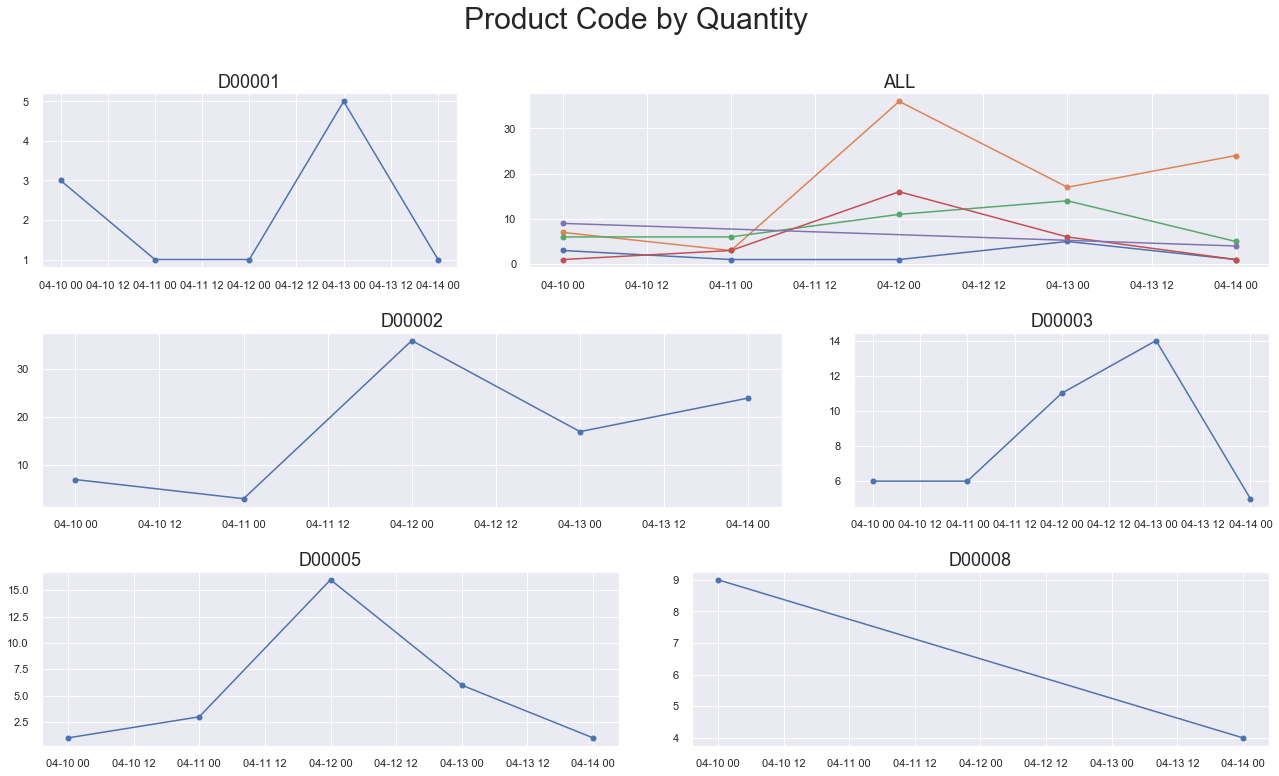

In [844]:
# Create the fig
fig = plt.figure(figsize=(22,12))

fig.tight_layout(pad=5.0)

# Create the gridSpec
gs = gridspec.GridSpec(6,8)

# Add the title for all the visuals
plt.suptitle("Product Code by Quantity", fontsize=30)

# Adjust the subplots
plt.subplots_adjust(hspace = 1.2,wspace = 0.8)

# Define the subplots
d00001_subplot = plt.subplot(gs[:2,:-5])
d00000_subplot = plt.subplot(gs[:2,3:])
d00002_subplot = plt.subplot(gs[2:4,:-3])
d00003_subplot = plt.subplot(gs[2:4,5:])
d00005_subplot = plt.subplot(gs[4:,:-4])
d00008_subplot = plt.subplot(gs[4:,4:])

# Define the titles
d00001_subplot.set_title(label="D00001", fontdict={"fontsize":18})
d00000_subplot.set_title(label="ALL", fontdict={"fontsize":18})
d00002_subplot.set_title(label="D00002", fontdict={"fontsize":18})
d00003_subplot.set_title(label="D00003", fontdict={"fontsize":18})
d00005_subplot.set_title(label="D00005", fontdict={"fontsize":18})
d00008_subplot.set_title(label="D00008", fontdict={"fontsize":18})

d00001_subplot.plot_date(d0001_shop_dates, d0001_dates_df["QUANTITY"],ls="-")
d00002_subplot.plot_date(d0002_shop_dates, d0002_dates_df["QUANTITY"],ls="-")
d00003_subplot.plot_date(d0003_shop_dates, d0003_dates_df["QUANTITY"],ls="-")
d00005_subplot.plot_date(d0005_shop_dates, d0005_dates_df["QUANTITY"],ls="-")
d00008_subplot.plot_date(d0008_shop_dates, d0008_dates_df["QUANTITY"],ls="-")

d00000_subplot.plot_date(d0001_shop_dates, d0001_dates_df["QUANTITY"],ls="-", label="d00001")
d00000_subplot.plot_date(d0002_shop_dates, d0002_dates_df["QUANTITY"],ls="-", label="d00002")
d00000_subplot.plot_date(d0003_shop_dates, d0003_dates_df["QUANTITY"],ls="-", label="d00003")
d00000_subplot.plot_date(d0005_shop_dates, d0005_dates_df["QUANTITY"],ls="-", label="d00005")
d00000_subplot.plot_date(d0008_shop_dates, d0008_dates_df["QUANTITY"],ls="-", label="d00008")

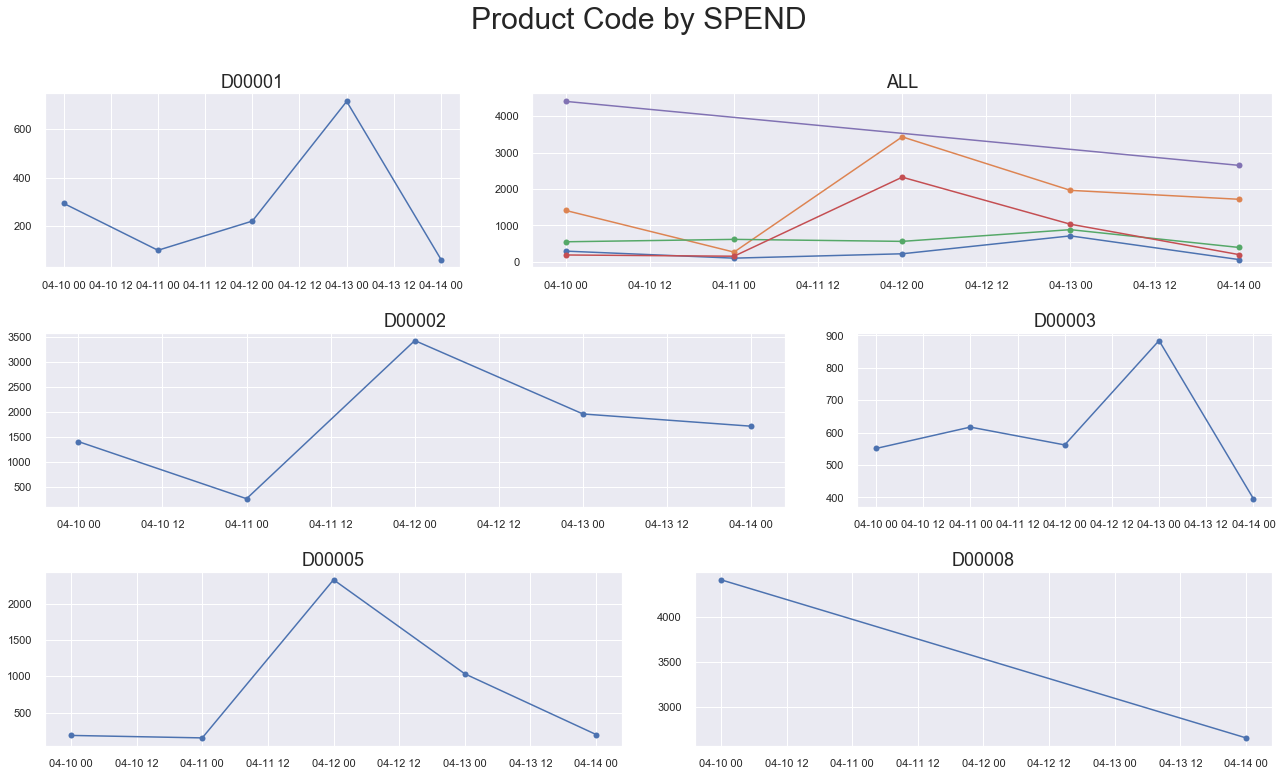

In [845]:
# Create the fig
fig = plt.figure(figsize=(22,12))

fig.tight_layout(pad=5.0)

# Create the gridSpec
gs = gridspec.GridSpec(6,8)

# Add the title for all the visuals
plt.suptitle("Product Code by SPEND", fontsize=30)

# Adjust the subplots
plt.subplots_adjust(hspace = 1.2,wspace = 0.8)

# Define the subplots
d00001_subplot = plt.subplot(gs[:2,:-5])
d00000_subplot = plt.subplot(gs[:2,3:])
d00002_subplot = plt.subplot(gs[2:4,:-3])
d00003_subplot = plt.subplot(gs[2:4,5:])
d00005_subplot = plt.subplot(gs[4:,:-4])
d00008_subplot = plt.subplot(gs[4:,4:])

# Define the titles
d00001_subplot.set_title(label="D00001", fontdict={"fontsize":18})
d00000_subplot.set_title(label="ALL", fontdict={"fontsize":18})
d00002_subplot.set_title(label="D00002", fontdict={"fontsize":18})
d00003_subplot.set_title(label="D00003", fontdict={"fontsize":18})
d00005_subplot.set_title(label="D00005", fontdict={"fontsize":18})
d00008_subplot.set_title(label="D00008", fontdict={"fontsize":18})

d00001_subplot.plot_date(d0001_shop_spend_dates, d0001_spend_dates_df["SPEND"],ls="-")
d00002_subplot.plot_date(d0002_shop_spend_dates, d0002_spend_dates_df["SPEND"],ls="-")
d00003_subplot.plot_date(d0003_shop_spend_dates, d0003_spend_dates_df["SPEND"],ls="-")
d00005_subplot.plot_date(d0005_shop_spend_dates, d0005_spend_dates_df["SPEND"],ls="-")
d00008_subplot.plot_date(d0008_shop_spend_dates, d0008_spend_dates_df["SPEND"],ls="-")

d00000_subplot.plot_date(d0001_shop_spend_dates, d0001_spend_dates_df["SPEND"],ls="-", label="d00001")
d00000_subplot.plot_date(d0002_shop_spend_dates, d0002_spend_dates_df["SPEND"],ls="-", label="d00002")
d00000_subplot.plot_date(d0003_shop_spend_dates, d0003_spend_dates_df["SPEND"],ls="-", label="d00003")
d00000_subplot.plot_date(d0005_shop_spend_dates, d0005_spend_dates_df["SPEND"],ls="-", label="d00005")
d00000_subplot.plot_date(d0008_shop_spend_dates, d0008_spend_dates_df["SPEND"],ls="-", label="d00008")

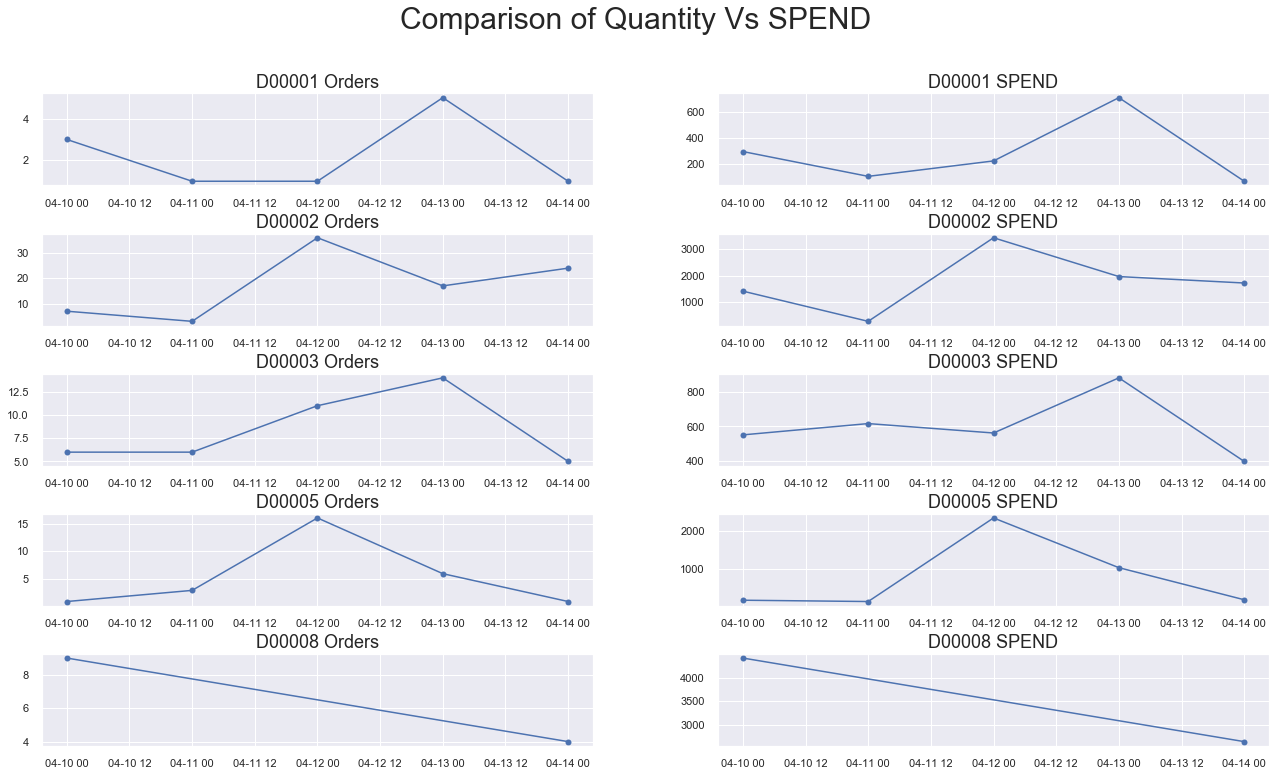

In [846]:
# Create the fig
fig = plt.figure(figsize=(22,12))

fig.tight_layout(pad=5.0)

# Create the gridSpec
gs = gridspec.GridSpec(10,8)

# Add the title for all the visuals
plt.suptitle("Comparison of Quantity Vs SPEND", fontsize=30)

# Adjust the subplots
plt.subplots_adjust(hspace = 2.2,wspace = 2.8)

# Define the subplots
d00001_subplot = plt.subplot(gs[:2,:-4])
d00000_subplot = plt.subplot(gs[:2,4:])
d00002_subplot = plt.subplot(gs[2:4,:-4])
d00003_subplot = plt.subplot(gs[2:4,4:])
d00005_subplot = plt.subplot(gs[4:6,:-4])
d00008_subplot = plt.subplot(gs[4:6,4:])

d00009_subplot = plt.subplot(gs[6:8,:-4])
d00010_subplot = plt.subplot(gs[6:8,4:])

d00011_subplot = plt.subplot(gs[8:,:-4])
d00012_subplot = plt.subplot(gs[8:,4:])

# Define the titles
d00001_subplot.set_title(label="D00001 Orders", fontdict={"fontsize":18})
d00000_subplot.set_title(label="D00001 SPEND", fontdict={"fontsize":18})
d00002_subplot.set_title(label="D00002 Orders", fontdict={"fontsize":18})
d00003_subplot.set_title(label="D00002 SPEND", fontdict={"fontsize":18})
d00005_subplot.set_title(label="D00003 Orders", fontdict={"fontsize":18})
d00008_subplot.set_title(label="D00003 SPEND", fontdict={"fontsize":18})
d00009_subplot.set_title(label="D00005 Orders", fontdict={"fontsize":18})
d00010_subplot.set_title(label="D00005 SPEND", fontdict={"fontsize":18})
d00011_subplot.set_title(label="D00008 Orders", fontdict={"fontsize":18})
d00012_subplot.set_title(label="D00008 SPEND", fontdict={"fontsize":18})

d00001_subplot.plot_date(d0001_shop_dates, d0001_dates_df["QUANTITY"],ls="-")
d00000_subplot.plot_date(d0001_shop_spend_dates, d0001_spend_dates_df["SPEND"],ls="-")

d00002_subplot.plot_date(d0002_shop_dates, d0002_dates_df["QUANTITY"],ls="-")
d00003_subplot.plot_date(d0002_shop_spend_dates, d0002_spend_dates_df["SPEND"],ls="-", label="d00002")

d00005_subplot.plot_date(d0003_shop_dates, d0003_dates_df["QUANTITY"],ls="-")
d00008_subplot.plot_date(d0003_shop_spend_dates, d0003_spend_dates_df["SPEND"],ls="-", label="d00003")

d00009_subplot.plot_date(d0005_shop_dates, d0005_dates_df["QUANTITY"],ls="-")
d00010_subplot.plot_date(d0005_shop_spend_dates, d0005_spend_dates_df["SPEND"],ls="-", label="d00005")

d00011_subplot.plot_date(d0008_shop_dates, d0008_dates_df["QUANTITY"],ls="-")
d00012_subplot.plot_date(d0008_shop_spend_dates, d0008_spend_dates_df["SPEND"],ls="-", label="d00008")

### Check the product_code_40 distribution by customer price sensitivity

In [847]:
cust_price_sensitivity_df = supermarket_till_transactions_df.groupby(["CUST_PRICE_SENSITIVITY"]).size().reset_index(name="COUNT")
cust_price_sensitivity_df

,CUST_PRICE_SENSITIVITY,COUNT
0,LA,42
1,MM,27
2,UM,4


In [848]:
# Replace with the actual names LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified
customer_price_sensitivity_dict = {"LA" : "Less Affluent","MM" : "Mid Market", "UM" : "Up Market", "XX" : "Unclassified"}

# Replace the values 
cust_price_sensitivity_df["CUST_PRICE_SENSITIVITY"].replace(customer_price_sensitivity_dict,inplace=True)

# Display the data
cust_price_sensitivity_df

,CUST_PRICE_SENSITIVITY,COUNT
0,Less Affluent,42
1,Mid Market,27
2,Up Market,4


<font color="red">**NB** - The customer price sensitivity is also imbalanced and needs to be addressed as such </font>

In [849]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
84,200607,2006-04-12,4,13,1,113,PRD0902957,CL00198,DEP00067,G00021,D00005,NaN,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
65,200607,2006-04-12,4,20,1,41,PRD0901382,CL00128,DEP00046,G00013,D00003,NaN,NaN,NaN,994100100091691,M,MM,Small Shop,Fresh,STORE00025,XLS,S02
36,200607,2006-04-13,5,8,1,135,PRD0903033,CL00073,DEP00021,G00007,D00002,CUST0000410932,MM,OT,994100100398404,L,MM,Full Shop,Mixed,STORE00008,MS,N01
73,200607,2006-04-14,6,16,3,69,PRD0904743,CL00070,DEP00020,G00007,D00002,CUST0000646899,LA,OA,994100100540328,M,LA,Small Shop,Fresh,STORE00051,MS,W02
100,200607,2006-04-12,4,15,6,138,PRD0904743,CL00070,DEP00020,G00007,D00002,NaN,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03


In [850]:
prod_code_40_with_cust_price_sensitity_df = supermarket_till_transactions_df[["PROD_CODE_40","CUST_PRICE_SENSITIVITY"]]
prod_code_40_with_cust_price_sensitity_df.sample(5)

,PROD_CODE_40,CUST_PRICE_SENSITIVITY
59,D00001,NaN
51,D00002,NaN
11,D00002,LA
83,D00002,NaN
5,D00003,LA


In [851]:
# Check for Nulls
prod_code_40_with_cust_price_sensitity_df.isnull().sum()

PROD_CODE_40               0
CUST_PRICE_SENSITIVITY    46
dtype: int64

In [852]:
# Fill the Null Customer Price Sensitivity with XX to indicate that they are unclassified
prod_code_40_with_cust_price_sensitity_df["CUST_PRICE_SENSITIVITY"].fillna("XX",inplace=True)

In [853]:
# Check if we still have nulls
prod_code_40_with_cust_price_sensitity_df.isnull().sum()

PROD_CODE_40              0
CUST_PRICE_SENSITIVITY    0
dtype: int64

In [854]:
# Check the data
prod_code_40_with_cust_price_sensitity_df.sample(5)

,PROD_CODE_40,CUST_PRICE_SENSITIVITY
32,D00001,MM
67,D00002,XX
41,D00003,MM
98,D00003,XX
66,D00002,XX


In [855]:
prod_code_40_with_cust_price_sensitity_grouped_df = prod_code_40_with_cust_price_sensitity_df
                .groupby(["PROD_CODE_40","CUST_PRICE_SENSITIVITY"]).size().reset_index(name="COUNT")
prod_code_40_with_cust_price_sensitity_grouped_df.sample(5)

,PROD_CODE_40,CUST_PRICE_SENSITIVITY,COUNT
0,D00001,LA,3
3,D00001,XX,1
5,D00002,MM,6
10,D00003,XX,11
2,D00001,UM,1


In [856]:
# Change the mappings
prod_code_40_with_cust_price_sensitity_grouped_df["CUST_PRICE_SENSITIVITY"]
                .replace(customer_price_sensitivity_dict,inplace=True)
prod_code_40_with_cust_price_sensitity_grouped_df.sample(5)

,PROD_CODE_40,CUST_PRICE_SENSITIVITY,COUNT
9,D00003,Mid Market,6
7,D00002,Unclassified,28
8,D00003,Less Affluent,10
14,D00005,Unclassified,3
6,D00002,Up Market,1


**Grouped Bar Chart**
The groups will be the customer price sensitivity with the PROD_CODE_40 being the list of values

In [857]:
d00001_list = prod_code_40_with_cust_price_sensitity_grouped_df[
    prod_code_40_with_cust_price_sensitity_grouped_df["PROD_CODE_40"] == "D00001"]
d00002_list = prod_code_40_with_cust_price_sensitity_grouped_df[
    prod_code_40_with_cust_price_sensitity_grouped_df["PROD_CODE_40"] == "D00002"]
d00003_list = prod_code_40_with_cust_price_sensitity_grouped_df[
    prod_code_40_with_cust_price_sensitity_grouped_df["PROD_CODE_40"] == "D00003"]
d00005_list = prod_code_40_with_cust_price_sensitity_grouped_df[
    prod_code_40_with_cust_price_sensitity_grouped_df["PROD_CODE_40"] == "D00005"]
d00008_list = prod_code_40_with_cust_price_sensitity_grouped_df[
    prod_code_40_with_cust_price_sensitity_grouped_df["PROD_CODE_40"] == "D00008"]
d00003_list

,PROD_CODE_40,CUST_PRICE_SENSITIVITY,COUNT
8,D00003,Less Affluent,10
9,D00003,Mid Market,6
10,D00003,Unclassified,11


In [858]:
# List of Values
d00001_list_count = d00001_list["COUNT"]
d00002_list_count = d00002_list["COUNT"]
d00003_list_count = d00003_list["COUNT"]
d00005_list_count = d00005_list["COUNT"]
d00008_list_count = d00008_list["COUNT"]
d00003_list_count

8     10
9      6
10    11
Name: COUNT, dtype: int64

In [859]:
# Check how many categories we have in customer life sensitivity
prod_code_40_with_cust_price_sensitity_grouped_df["CUST_PRICE_SENSITIVITY"].value_counts()

Less Affluent    5
Unclassified     5
Mid Market       4
Up Market        3
Name: CUST_PRICE_SENSITIVITY, dtype: int64

In [860]:
# The number of customer life sensitivity
N = 4

# Number of locations to plot
index = np.arange(4)

# width of plotting
width = 0.15

In [861]:
# Define the tupples
d00001_list_of_values = (d00001_list_count)
d00002_list_of_values = (d00002_list_count)
d00003_list_of_values = ([10,6,11,0])
d00005_list_of_values = (d00005_list_count)
d00008_list_of_values = ([5,3,0,0])
d00008_list_of_values

[5, 3, 0, 0]

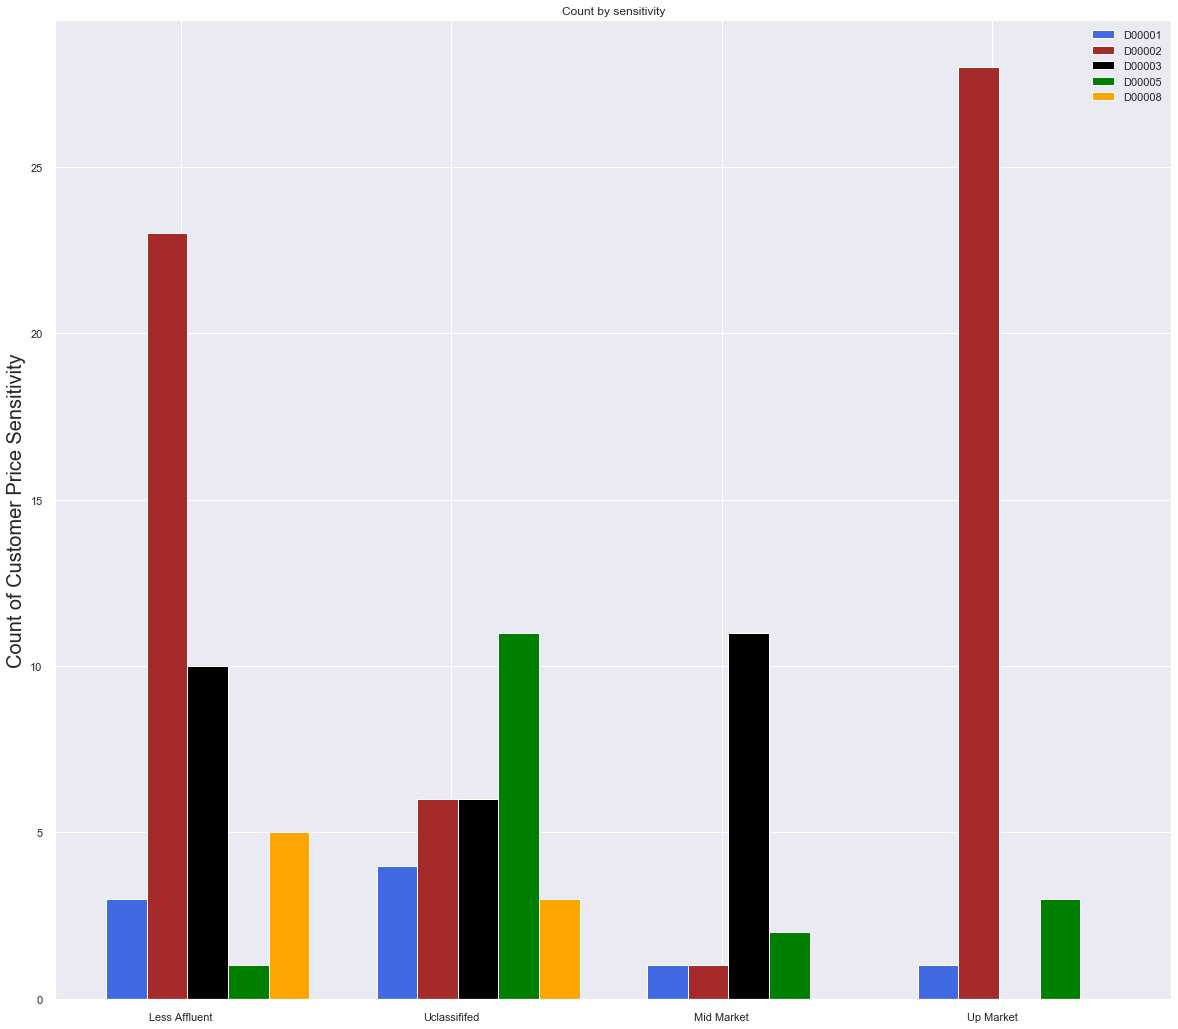

In [862]:
# plotting the graph

fig = plt.figure(figsize=(20,18))

ax = fig.add_subplot(111)

d00001_values = ax.bar(index, d00001_list_of_values, width, color='royalblue')
d00002_values = ax.bar(index+width, d00002_list_of_values, width, color='brown')
d00003_values = ax.bar(index+width+width, d00003_list_of_values, width, color='black')
d00005_values = ax.bar(index+width+width+width, d00005_list_of_values, width, color='green')
d00008_values = ax.bar(index+width+width+width+width, d00008_list_of_values, width, color='orange')

ax.set_ylabel('Count of Customer Price Sensitivity',fontdict={"fontsize":20})
ax.set_title('Count by sensitivity')
ax.set_xticks(index + width + width / 3)
ax.set_xticklabels( ('Less Affluent', 'Uclassififed', 'Mid Market', 'Up Market') )


# Legend
ax.legend( (d00001_values[0], d00002_values[0], d00003_values[0], d00005_values[0], d00008_values[0]), 
          ('D00001', 'D00002','D00003', 'D00005', 'D00008') )

**NB** - From the above graph, it is keen to note that if an array of values has less records and the N then it throws an error

### Check the product_code_40 distribution by customer life stage

In [863]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
72,200607,2006-04-14,6,16,1,154,PRD0904358,CL00063,DEP00019,G00007,D00002,CUST0000646899,LA,OA,994100100540328,M,LA,Small Shop,Fresh,STORE00051,MS,W02
25,200607,2006-04-14,6,15,1,92,PRD0903052,CL00031,DEP00008,G00004,D00002,CUST0000089820,LA,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01
12,200607,2006-04-14,6,15,1,17,PRD0900167,CL00130,DEP00047,G00013,D00003,CUST0000089820,LA,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01
103,200607,2006-04-12,4,12,3,513,PRD0903190,CL00204,DEP00068,G00022,D00005,CUST0000530875,MM,OF,994100100470269,L,UM,Top Up,Nonfood,STORE00288,LS,S03
54,200607,2006-04-10,2,9,1,146,PRD0901882,CL00048,DEP00012,G00004,D00002,NaN,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02


In [864]:
cust_life_stage_df = supermarket_till_transactions_df.groupby(["CUST_LIFESTAGE"]).size().reset_index(name="COUNT")
cust_life_stage_df

,CUST_LIFESTAGE,COUNT
0,OA,11
1,OF,6
2,OT,38
3,YA,4
4,YF,14


In [865]:
customer_life_stage_dict = {"YA" : "Young Adults","OA" : "Older Adults", "YF" : "Young Families", "OF" : "Older Families",
                            "PE" : "Pensioners","OT" : "Other", "XX" : "Unclassified"}

# Replace the values 
cust_life_stage_df["CUST_LIFESTAGE"].replace(customer_life_stage_dict,inplace=True)

# Display the data
cust_life_stage_df

,CUST_LIFESTAGE,COUNT
0,Older Adults,11
1,Older Families,6
2,Other,38
3,Young Adults,4
4,Young Families,14


<font color="red">**NB** - The customer life stage is also imbalanced and needs to be addressed as such </font>

In [866]:
prod_code_40_by_cust_life_stage_df = supermarket_till_transactions_df[["PROD_CODE_40","CUST_LIFESTAGE"]]
prod_code_40_by_cust_life_stage_df.sample(5)

,PROD_CODE_40,CUST_LIFESTAGE
85,D00002,NaN
81,D00002,NaN
70,D00002,NaN
24,D00003,OT
115,D00008,OA


In [867]:
# Check for null values
prod_code_40_by_cust_life_stage_df.isnull().sum()

PROD_CODE_40       0
CUST_LIFESTAGE    46
dtype: int64

In [868]:
prod_code_40_by_cust_life_stage_df["CUST_LIFESTAGE"].fillna("XX",inplace=True)

In [869]:
prod_code_40_by_cust_life_stage_df = prod_code_40_by_cust_life_stage_df.groupby(["PROD_CODE_40","CUST_LIFESTAGE"])
            .size().reset_index(name="COUNT")
prod_code_40_by_cust_life_stage_df["CUST_LIFESTAGE"].replace(customer_life_stage_dict,inplace=True)
prod_code_40_by_cust_life_stage_df

,PROD_CODE_40,CUST_LIFESTAGE,COUNT
0,D00001,Older Adults,1
1,D00001,Other,4
2,D00001,Unclassified,1
3,D00001,Young Adults,1
4,D00001,Young Families,2
5,D00002,Older Adults,4
6,D00002,Other,16
7,D00002,Unclassified,28
8,D00002,Young Adults,1
9,D00002,Young Families,9


In [870]:
d00001_life_stage_list = prod_code_40_by_cust_life_stage_df[prod_code_40_by_cust_life_stage_df["PROD_CODE_40"] == "D00001"]
d00002_life_stage_list = prod_code_40_by_cust_life_stage_df[prod_code_40_by_cust_life_stage_df["PROD_CODE_40"] == "D00002"]
d00003_life_stage_list = prod_code_40_by_cust_life_stage_df[prod_code_40_by_cust_life_stage_df["PROD_CODE_40"] == "D00003"]
d00005_life_stage_list = prod_code_40_by_cust_life_stage_df[prod_code_40_by_cust_life_stage_df["PROD_CODE_40"] == "D00005"]
d00008_life_stage_list = prod_code_40_by_cust_life_stage_df[prod_code_40_by_cust_life_stage_df["PROD_CODE_40"] == "D00008"]
d00003_life_stage_list

,PROD_CODE_40,CUST_LIFESTAGE,COUNT
10,D00003,Older Adults,1
11,D00003,Other,12
12,D00003,Unclassified,11
13,D00003,Young Families,3


In [871]:
# List of Values
d00001_life_stage_list_count = d00001_life_stage_list["COUNT"]
d00002_life_stage_list_count = d00002_life_stage_list["COUNT"]
d00003_life_stage_list_count = d00003_life_stage_list["COUNT"]
d00005_life_stage_list_count = d00005_life_stage_list["COUNT"]
d00008_life_stage_list_count = d00008_life_stage_list["COUNT"]
d00008_life_stage_list_count

18    5
19    3
Name: COUNT, dtype: int64

In [872]:
# Check how many categories we have in customer life stage
prod_code_40_by_cust_life_stage_df["CUST_LIFESTAGE"].value_counts()

Unclassified      5
Older Adults      4
Other             4
Young Families    3
Young Adults      3
Older Families    1
Name: CUST_LIFESTAGE, dtype: int64

In [873]:
# The number of customer life stage
N = 5

# Number of locations to plot
index = np.arange(N)

# width of plotting
width = 0.15

In [874]:
# Define the tupples
d00001_life_stage_list_of_values = ([1,4,1,1,2])
d00002_life_stage_list_of_values = ([4,16,28,1,9])
d00003_life_stage_list_of_values = ([1,12,11,3,0])
d00005_life_stage_list_of_values = ([6,6,3,2,0])
d00008_life_stage_list_of_values = ([5,3,0,0,0])
d00005_life_stage_list_of_values

[6, 6, 3, 2, 0]

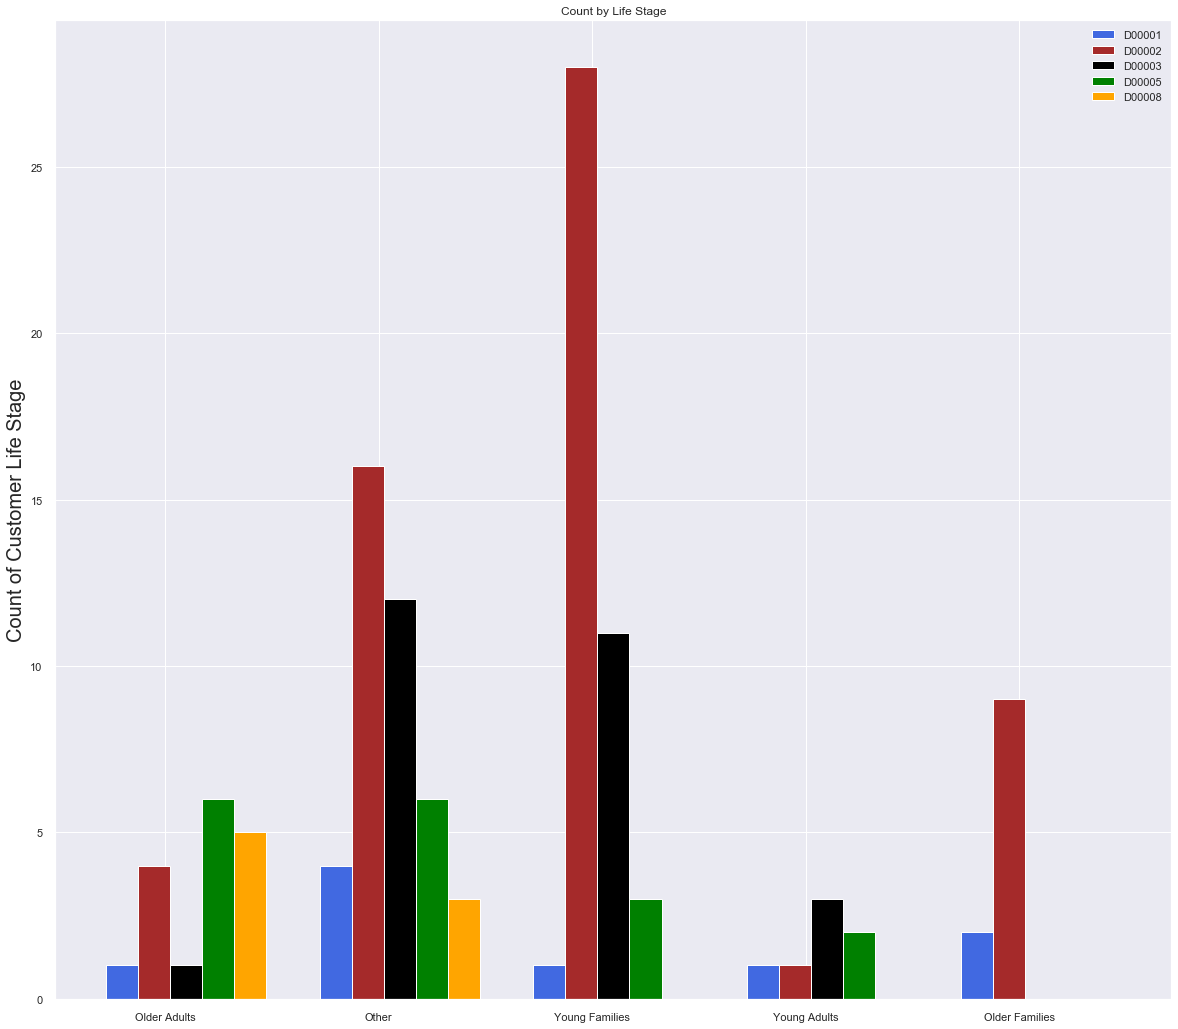

In [875]:
# plotting the graph

fig = plt.figure(figsize=(20,18))

ax = fig.add_subplot(111)

d00001_life_stage_values = ax.bar(index, d00001_life_stage_list_of_values, width, color='royalblue')
d00002_life_stage_values = ax.bar(index+width, d00002_life_stage_list_of_values, width, color='brown')
d00003_life_stage_values = ax.bar(index+width+width, d00003_life_stage_list_of_values, width, color='black')
d00005_life_stage_values = ax.bar(index+width+width+width, d00005_life_stage_list_of_values, width, color='green')
d00008_life_stage_values = ax.bar(index+width+width+width+width, d00008_life_stage_list_of_values, width, color='orange')

ax.set_ylabel('Count of Customer Life Stage',fontdict={"fontsize":20})
ax.set_title('Count by Life Stage')
ax.set_xticks(index + width + width / 3)
ax.set_xticklabels( ('Older Adults', 'Other', 'Young Families', 'Young Adults','Older Families') )


# Legend
ax.legend( (d00001_values[0], d00002_values[0], d00003_values[0], d00005_values[0], d00008_values[0]), 
          ('D00001', 'D00002','D00003', 'D00005', 'D00008') )

In [876]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
118,200607,2006-04-14,6,19,1,499,PRD0903833,CL00234,DEP00083,G00028,D00008,CUST0000646899,LA,OA,994100100540327,M,MM,Small Shop,Grocery,STORE02847,LS,N01
50,200607,2006-04-10,2,9,1,125,PRD0901020,CL00049,DEP00012,G00004,D00002,NaN,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02
109,200607,2006-04-11,3,10,1,101,PRD0902295,CL00014,DEP00004,G00003,D00001,CUST0000701483,UM,YA,994100100573192,M,LA,Small Shop,Nonfood,STORE00470,LS,S01
99,200607,2006-04-12,4,15,1,164,PRD0904450,CL00156,DEP00053,G00016,D00003,NaN,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03
53,200607,2006-04-10,2,9,1,188,PRD0901691,CL00205,DEP00069,G00022,D00005,NaN,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02


In [877]:
basket_size_df = supermarket_till_transactions_df.groupby(["BASKET_SIZE"]).size().reset_index(name="COUNT")
basket_size_df

,BASKET_SIZE,COUNT
0,L,83
1,M,30
2,S,6


In [878]:
# Replace with the actual names L=Large, M=Medium, S=Small
basket_size_dict = {"L" : "Large","M" : "Medium", "S" : "Small"}

In [879]:
# Replace the values 
basket_size_df["BASKET_SIZE"].replace(basket_size_dict,inplace=True)

In [880]:
# Display the data
basket_size_df

,BASKET_SIZE,COUNT
0,Large,83
1,Medium,30
2,Small,6


<font color="red">**NB** - The customer life stage is also imbalanced and needs to be addressed as such </font>

In [881]:
prod_code_40_by_basket_size_df = supermarket_till_transactions_df[["PROD_CODE_40","BASKET_SIZE"]]
prod_code_40_by_basket_size_df.sample(5)

,PROD_CODE_40,BASKET_SIZE
60,D00008,L
19,D00002,M
24,D00003,M
48,D00008,L
38,D00001,L


In [882]:
# Check for null values
prod_code_40_by_basket_size_df.isnull().sum()

PROD_CODE_40    0
BASKET_SIZE     0
dtype: int64

In [883]:
prod_code_40_by_basket_size_df = prod_code_40_by_basket_size_df.groupby(["PROD_CODE_40","BASKET_SIZE"])
            .size().reset_index(name="COUNT")
prod_code_40_by_basket_size_df["BASKET_SIZE"].replace(basket_size_dict,inplace=True)
prod_code_40_by_basket_size_df

,PROD_CODE_40,BASKET_SIZE,COUNT
0,D00001,Large,6
1,D00001,Medium,3
2,D00002,Large,39
3,D00002,Medium,14
4,D00002,Small,5
5,D00003,Large,21
6,D00003,Medium,6
7,D00005,Large,14
8,D00005,Medium,3
9,D00008,Large,3


In [884]:
d00001_basket_size_list = prod_code_40_by_basket_size_df[prod_code_40_by_basket_size_df["PROD_CODE_40"] == "D00001"]
d00002_basket_size_list = prod_code_40_by_basket_size_df[prod_code_40_by_basket_size_df["PROD_CODE_40"] == "D00002"]
d00003_basket_size_list = prod_code_40_by_basket_size_df[prod_code_40_by_basket_size_df["PROD_CODE_40"] == "D00003"]
d00005_basket_size_list = prod_code_40_by_basket_size_df[prod_code_40_by_basket_size_df["PROD_CODE_40"] == "D00005"]
d00008_basket_size_list = prod_code_40_by_basket_size_df[prod_code_40_by_basket_size_df["PROD_CODE_40"] == "D00008"]
d00003_basket_size_list

,PROD_CODE_40,BASKET_SIZE,COUNT
5,D00003,Large,21
6,D00003,Medium,6


In [885]:
# List of Values
d00001_basket_size_list_count = d00001_basket_size_list["COUNT"]
d00002_basket_size_list_count = d00002_basket_size_list["COUNT"]
d00003_basket_size_list_count = d00003_basket_size_list["COUNT"]
d00005_basket_size_list_count = d00005_basket_size_list["COUNT"]
d00008_basket_size_list_count = d00008_basket_size_list["COUNT"]
d00008_basket_size_list_count

9     3
10    4
11    1
Name: COUNT, dtype: int64

In [886]:
# Check how many categories we have in basket size
prod_code_40_by_basket_size_df["BASKET_SIZE"].value_counts()

Medium    5
Large     5
Small     2
Name: BASKET_SIZE, dtype: int64

In [887]:
# The number of basket size
N = 3

# Number of locations to plot
index = np.arange(N)

# width of plotting
width = 0.15

In [888]:

# Define the tupples
d00001_basket_size_list_of_values = ([6,3,0])
d00002_basket_size_list_of_values = ([39,14,5])
d00003_basket_size_list_of_values = ([21,6,0])
d00005_basket_size_list_of_values = ([14,3,0])
d00008_basket_size_list_of_values = ([3,4,1])
d00005_basket_size_list_of_values

[14, 3, 0]

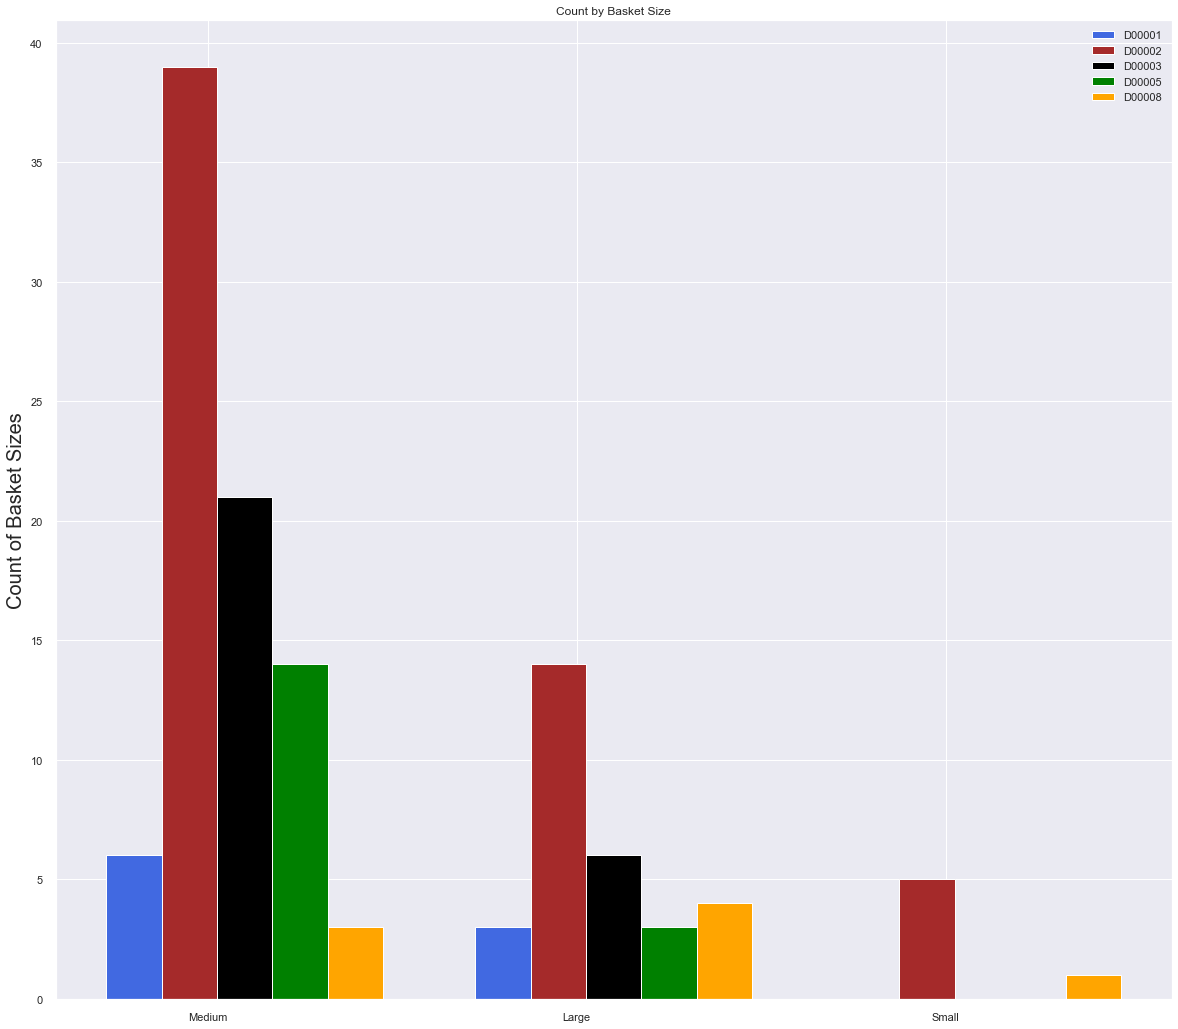

In [889]:
# plotting the graph

fig = plt.figure(figsize=(20,18))

ax = fig.add_subplot(111)

d00001_basket_size_values = ax.bar(index, d00001_basket_size_list_of_values, width, color='royalblue')
d00002_basket_size_values = ax.bar(index+width, d00002_basket_size_list_of_values, width, color='brown')
d00003_basket_size_values = ax.bar(index+width+width, d00003_basket_size_list_of_values, width, color='black')
d00005_basket_size_values = ax.bar(index+width+width+width, d00005_basket_size_list_of_values, width, color='green')
d00008_basket_size_values = ax.bar(index+width+width+width+width, d00008_basket_size_list_of_values, width, color='orange')

ax.set_ylabel('Count of Basket Sizes',fontdict={"fontsize":20})
ax.set_title('Count by Basket Size')
ax.set_xticks(index + width + width / 3)
ax.set_xticklabels( ('Medium', 'Large', 'Small') )


# Legend
ax.legend( (d00001_values[0], d00002_values[0], d00003_values[0], d00005_values[0], d00008_values[0]), 
          ('D00001', 'D00002','D00003', 'D00005', 'D00008') )


In [890]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
115,200607,2006-04-14,6,19,1,485,PRD0900114,CL00237,DEP00084,G00028,D00008,CUST0000646899,LA,OA,994100100540327,M,MM,Small Shop,Grocery,STORE02847,LS,N01
84,200607,2006-04-12,4,13,1,113,PRD0902957,CL00198,DEP00067,G00021,D00005,NaN,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
25,200607,2006-04-14,6,15,1,92,PRD0903052,CL00031,DEP00008,G00004,D00002,CUST0000089820,LA,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01
77,200607,2006-04-11,3,13,1,182,PRD0902695,CL00070,DEP00020,G00007,D00002,CUST0000894444,MM,OT,994100100689262,M,UM,Top Up,Grocery,STORE00059,MS,W02
72,200607,2006-04-14,6,16,1,154,PRD0904358,CL00063,DEP00019,G00007,D00002,CUST0000646899,LA,OA,994100100540328,M,LA,Small Shop,Fresh,STORE00051,MS,W02


In [891]:
basket_price_sensitivity_df = supermarket_till_transactions_df.groupby(["BASKET_PRICE_SENSITIVITY"]).size()
                    .reset_index(name="COUNT")
basket_price_sensitivity_df

,BASKET_PRICE_SENSITIVITY,COUNT
0,LA,40
1,MM,36
2,UM,43


In [892]:
# Replace with the actual names LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified
basket_price_sensitivity_dict = {"LA" : "Less Affluent","MM" : "Mid Market", "UM" : "Up Market", "XX" : "Unclassified"}

# Replace the values 
basket_price_sensitivity_df["BASKET_PRICE_SENSITIVITY"].replace(basket_price_sensitivity_dict,inplace=True)

# Display the data
basket_price_sensitivity_df

,BASKET_PRICE_SENSITIVITY,COUNT
0,Less Affluent,40
1,Mid Market,36
2,Up Market,43


In [893]:
prod_code_40_by_basket_price_sensitivity_df = supermarket_till_transactions_df[["PROD_CODE_40","BASKET_PRICE_SENSITIVITY"]]
prod_code_40_by_basket_price_sensitivity_df.sample(5)

,PROD_CODE_40,BASKET_PRICE_SENSITIVITY
80,D00002,UM
74,D00003,UM
89,D00003,LA
73,D00002,LA
64,D00002,MM


In [894]:
# Check for null values
prod_code_40_by_basket_price_sensitivity_df.isnull().sum()

PROD_CODE_40                0
BASKET_PRICE_SENSITIVITY    0
dtype: int64

In [895]:
prod_code_40_by_basket_price_sensitivity_df = prod_code_40_by_basket_price_sensitivity_df.groupby(
    ["PROD_CODE_40","BASKET_PRICE_SENSITIVITY"]).size().reset_index(name="COUNT")
prod_code_40_by_basket_price_sensitivity_df["BASKET_PRICE_SENSITIVITY"].replace(basket_price_sensitivity_dict,inplace=True)
prod_code_40_by_basket_price_sensitivity_df

,PROD_CODE_40,BASKET_PRICE_SENSITIVITY,COUNT
0,D00001,Less Affluent,3
1,D00001,Mid Market,5
2,D00001,Up Market,1
3,D00002,Less Affluent,22
4,D00002,Mid Market,16
5,D00002,Up Market,20
6,D00003,Less Affluent,12
7,D00003,Mid Market,6
8,D00003,Up Market,9
9,D00005,Less Affluent,3


In [896]:
d00001_basket_price_sensitivity_list = prod_code_40_by_basket_price_sensitivity_df[
    prod_code_40_by_basket_price_sensitivity_df["PROD_CODE_40"] == "D00001"]
d00002_basket_price_sensitivity_list = prod_code_40_by_basket_price_sensitivity_df[
    prod_code_40_by_basket_price_sensitivity_df["PROD_CODE_40"] == "D00002"]
d00003_basket_price_sensitivity_list = prod_code_40_by_basket_price_sensitivity_df[
    prod_code_40_by_basket_price_sensitivity_df["PROD_CODE_40"] == "D00003"]
d00005_basket_price_sensitivity_list = prod_code_40_by_basket_price_sensitivity_df[
    prod_code_40_by_basket_price_sensitivity_df["PROD_CODE_40"] == "D00005"]
d00008_basket_price_sensitivity_list = prod_code_40_by_basket_price_sensitivity_df[
    prod_code_40_by_basket_price_sensitivity_df["PROD_CODE_40"] == "D00008"]
d00003_basket_price_sensitivity_list

,PROD_CODE_40,BASKET_PRICE_SENSITIVITY,COUNT
6,D00003,Less Affluent,12
7,D00003,Mid Market,6
8,D00003,Up Market,9


In [897]:
# List of Values
d00001_basket_price_sensitivity_list_count = d00001_basket_price_sensitivity_list["COUNT"]
d00002_basket_price_sensitivity_list_count = d00002_basket_price_sensitivity_list["COUNT"]
d00003_basket_price_sensitivity_list_count = d00003_basket_price_sensitivity_list["COUNT"]
d00005_basket_price_sensitivity_list_count = d00005_basket_price_sensitivity_list["COUNT"]
d00008_basket_price_sensitivity_list_count = d00008_basket_price_sensitivity_list["COUNT"]
d00008_basket_price_sensitivity_list_count

12    5
13    3
Name: COUNT, dtype: int64

In [898]:
# Check how many categories we have in customer life stage
prod_code_40_by_basket_price_sensitivity_df["BASKET_PRICE_SENSITIVITY"].value_counts()

Mid Market       5
Up Market        5
Less Affluent    4
Name: BASKET_PRICE_SENSITIVITY, dtype: int64

In [899]:
# The number of customer life stage
N = 3

# Number of locations to plot
index = np.arange(N)

# width of plotting
width = 0.15

In [900]:
# Define the tupples
d00001_basket_price_sensitivity_list_of_values = ([3,5,1])
d00002_basket_price_sensitivity_list_of_values = ([22,16,20])
d00003_basket_price_sensitivity_list_of_values = ([12,6,9])
d00005_basket_price_sensitivity_list_of_values = ([3,4,10])
d00008_basket_price_sensitivity_list_of_values = ([5,3,0])
d00005_basket_price_sensitivity_list_of_values

[3, 4, 10]

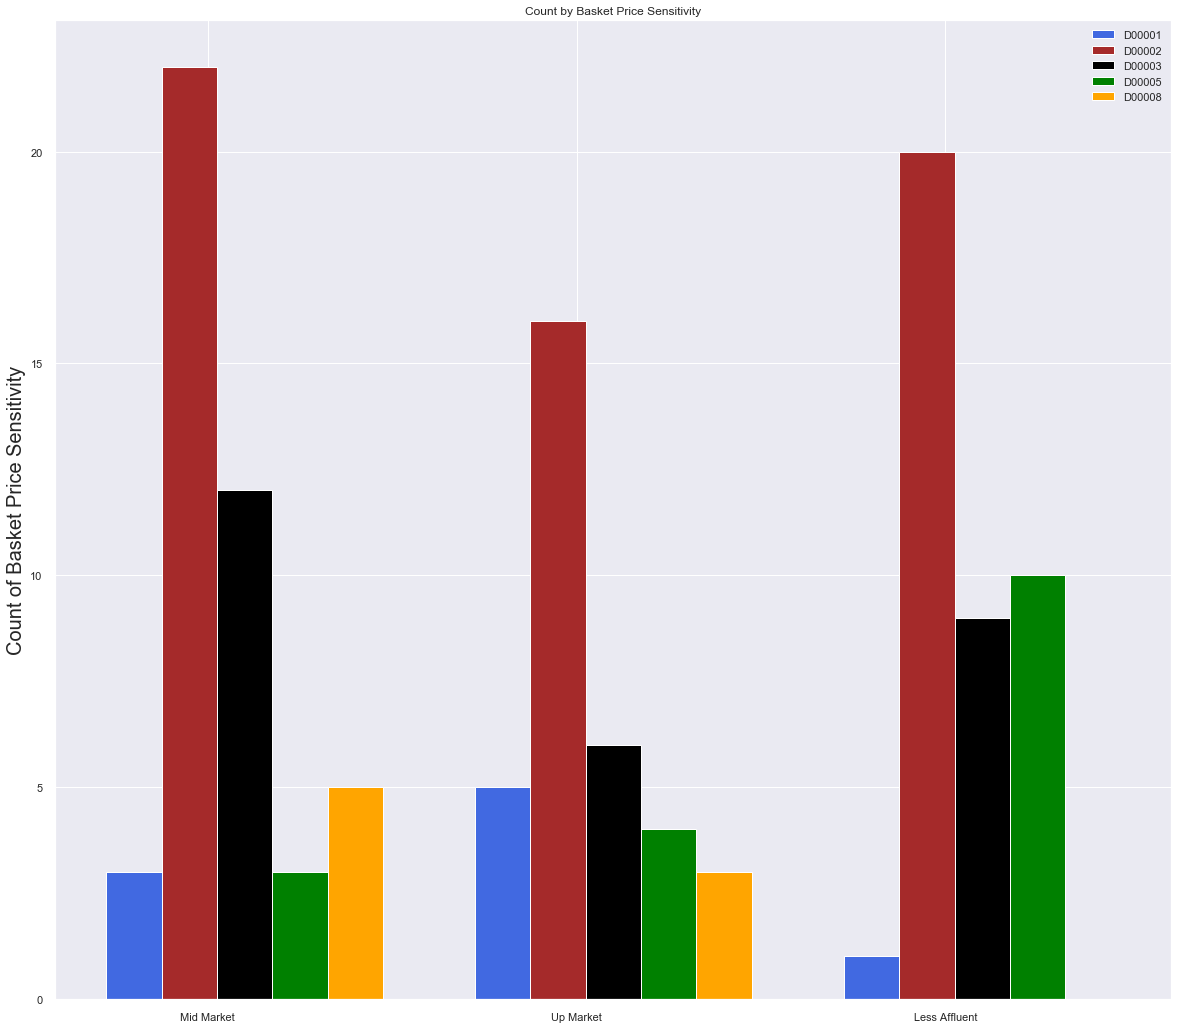

In [901]:
# plotting the graph

fig = plt.figure(figsize=(20,18))

ax = fig.add_subplot(111)

d00001_basket_price_sensitivity_values = ax.bar(index, 
                                                d00001_basket_price_sensitivity_list_of_values, width, color='royalblue')
d00002_basket_price_sensitivity_values = ax.bar(index+width, 
                                                d00002_basket_price_sensitivity_list_of_values, width, color='brown')
d00003_basket_price_sensitivity_values = ax.bar(index+width+width, 
                                                d00003_basket_price_sensitivity_list_of_values, width, color='black')
d00005_basket_price_sensitivity_values = ax.bar(index+width+width+width, 
                                                d00005_basket_price_sensitivity_list_of_values, width, color='green')
d00008_basket_price_sensitivity_values = ax.bar(index+width+width+width+width, 
                                                d00008_basket_price_sensitivity_list_of_values, width, color='orange')

ax.set_ylabel('Count of Basket Price Sensitivity',fontdict={"fontsize":20})
ax.set_title('Count by Basket Price Sensitivity')
ax.set_xticks(index + width + width / 3)
ax.set_xticklabels( ('Mid Market', 'Up Market', 'Less Affluent') )


# Legend
ax.legend( (d00001_values[0], d00002_values[0], d00003_values[0], d00005_values[0], d00008_values[0]), 
          ('D00001', 'D00002','D00003', 'D00005', 'D00008') )

In [902]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
88,200607,2006-04-12,4,13,1,28,PRD0904988,CL00214,DEP00071,G00022,D00005,NaN,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
39,200607,2006-04-13,5,8,3,243,PRD0903744,CL00199,DEP00067,G00021,D00005,CUST0000410932,MM,OT,994100100398404,L,MM,Full Shop,Mixed,STORE00008,MS,N01
2,200607,2006-04-13,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,D00003,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
0,200607,2006-04-13,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,D00001,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
102,200607,2006-04-12,4,12,3,273,PRD0900472,CL00198,DEP00067,G00021,D00005,CUST0000530875,MM,OF,994100100470269,L,UM,Top Up,Nonfood,STORE00288,LS,S03


In [903]:
cust_basket_type_df = supermarket_till_transactions_df.groupby(["BASKET_TYPE"]).size().reset_index(name="COUNT")
cust_basket_type_df

,BASKET_TYPE,COUNT
0,Full Shop,33
1,Small Shop,32
2,Top Up,54


In [904]:
prod_code_40_by_basket_type_df = supermarket_till_transactions_df[["PROD_CODE_40","BASKET_TYPE"]]
prod_code_40_by_basket_type_df.sample(5)

,PROD_CODE_40,BASKET_TYPE
93,D00002,Top Up
63,D00002,Small Shop
22,D00003,Top Up
111,D00005,Small Shop
71,D00001,Small Shop


In [905]:
# Check for null values
prod_code_40_by_basket_type_df.isnull().sum()

PROD_CODE_40    0
BASKET_TYPE     0
dtype: int64

In [906]:
prod_code_40_by_basket_type_df.groupby(["PROD_CODE_40","BASKET_TYPE"]).size()

PROD_CODE_40  BASKET_TYPE
D00001        Full Shop       5
              Small Shop      3
              Top Up          1
D00002        Full Shop      12
              Small Shop     18
              Top Up         28
D00003        Full Shop       8
              Small Shop      4
              Top Up         15
D00005        Full Shop       5
              Small Shop      2
              Top Up         10
D00008        Full Shop       3
              Small Shop      5
dtype: int64

In [907]:
prod_code_40_by_basket_type_df = prod_code_40_by_basket_type_df.groupby(["PROD_CODE_40","BASKET_TYPE"])
.size().reset_index(name="COUNT")
prod_code_40_by_basket_type_df

,PROD_CODE_40,BASKET_TYPE,COUNT
0,D00001,Full Shop,5
1,D00001,Small Shop,3
2,D00001,Top Up,1
3,D00002,Full Shop,12
4,D00002,Small Shop,18
5,D00002,Top Up,28
6,D00003,Full Shop,8
7,D00003,Small Shop,4
8,D00003,Top Up,15
9,D00005,Full Shop,5


In [908]:
d00001_basket_type_list = prod_code_40_by_basket_type_df[prod_code_40_by_basket_type_df["PROD_CODE_40"] == "D00001"]
d00002_basket_type_list = prod_code_40_by_basket_type_df[prod_code_40_by_basket_type_df["PROD_CODE_40"] == "D00002"]
d00003_basket_type_list = prod_code_40_by_basket_type_df[prod_code_40_by_basket_type_df["PROD_CODE_40"] == "D00003"]
d00005_basket_type_list = prod_code_40_by_basket_type_df[prod_code_40_by_basket_type_df["PROD_CODE_40"] == "D00005"]
d00008_basket_type_list = prod_code_40_by_basket_type_df[prod_code_40_by_basket_type_df["PROD_CODE_40"] == "D00008"]
d00001_basket_type_list

,PROD_CODE_40,BASKET_TYPE,COUNT
0,D00001,Full Shop,5
1,D00001,Small Shop,3
2,D00001,Top Up,1


In [909]:
# List of Values
d00001_basket_type_list_count = d00001_basket_type_list["COUNT"]
d00002_basket_type_list_count = d00002_basket_type_list["COUNT"]
d00003_basket_type_list_count = d00003_basket_type_list["COUNT"]
d00005_basket_type_list_count = d00005_basket_type_list["COUNT"]
d00008_basket_type_list_count = d00008_basket_type_list["COUNT"]
d00008_basket_type_list_count

12    3
13    5
Name: COUNT, dtype: int64

In [910]:
# Check how many categories we have in basket type
prod_code_40_by_basket_type_df["BASKET_TYPE"].value_counts()

Full Shop     5
Small Shop    5
Top Up        4
Name: BASKET_TYPE, dtype: int64

In [911]:
# The number of customer life stage
N = 3

# Number of locations to plot
index = np.arange(N)

# width of plotting
width = 0.15

In [912]:
# Define the tupples
d00001_basket_type_list_of_values = ([5,3,1])
d00002_basket_type_list_of_values = ([12,18,28])
d00003_basket_type_list_of_values = ([8,4,15])
d00005_basket_type_list_of_values = ([5,2,10])
d00008_basket_type_list_of_values = ([3,5,0])
d00005_basket_type_list_of_values

[5, 2, 10]

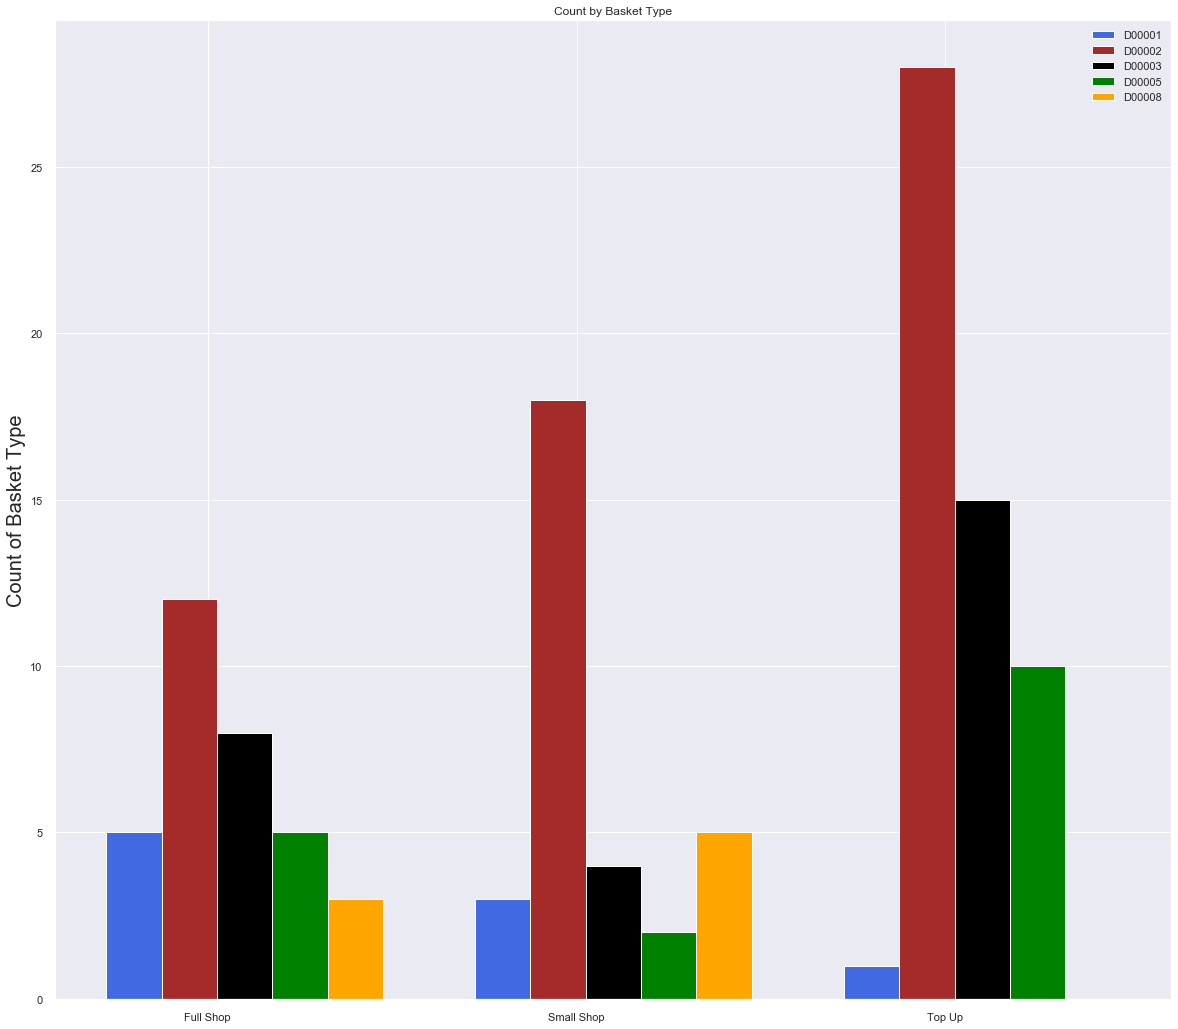

In [913]:
# plotting the graph

fig = plt.figure(figsize=(20,18))

ax = fig.add_subplot(111)

d00001_basket_type_values = ax.bar(index, d00001_basket_type_list_of_values, width, color='royalblue')
d00002_basket_type_values = ax.bar(index+width, d00002_basket_type_list_of_values, width, color='brown')
d00003_basket_type_values = ax.bar(index+width+width, d00003_basket_type_list_of_values, width, color='black')
d00005_basket_type_values = ax.bar(index+width+width+width, d00005_basket_type_list_of_values, width, color='green')
d00008_basket_type_values = ax.bar(index+width+width+width+width, d00008_basket_type_list_of_values, width, color='orange')

ax.set_ylabel('Count of Basket Type',fontdict={"fontsize":20})
ax.set_title('Count by Basket Type')
ax.set_xticks(index + width + width / 3)
ax.set_xticklabels( ('Full Shop', 'Small Shop', 'Top Up') )


# Legend
ax.legend( (d00001_values[0], d00002_values[0], d00003_values[0], d00005_values[0], d00008_values[0]), 
          ('D00001', 'D00002','D00003', 'D00005', 'D00008') )

**Basket Dominant Mission**

In [914]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
79,200607,2006-04-12,4,13,1,368,PRD0901068,CL00058,DEP00016,G00006,D00002,NaN,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
99,200607,2006-04-12,4,15,1,164,PRD0904450,CL00156,DEP00053,G00016,D00003,NaN,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03
61,200607,2006-04-10,2,9,1,39,PRD0904557,CL00154,DEP00052,G00015,D00003,NaN,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02
1,200607,2006-04-12,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,D00002,CUST0000634693,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
77,200607,2006-04-11,3,13,1,182,PRD0902695,CL00070,DEP00020,G00007,D00002,CUST0000894444,MM,OT,994100100689262,M,UM,Top Up,Grocery,STORE00059,MS,W02


In [915]:
basket_dominant_mission_df = supermarket_till_transactions_df.groupby(["BASKET_DOMINANT_MISSION"]).size()
            .reset_index(name="COUNT")
basket_dominant_mission_df

,BASKET_DOMINANT_MISSION,COUNT
0,Fresh,64
1,Grocery,9
2,Mixed,37
3,Nonfood,9


<font color="red">**NB** - The basket dominant mission is also imbalanced and needs to be addressed as such </font>

In [916]:
prod_code_40_by_basket_dominant_mission_df = supermarket_till_transactions_df[["PROD_CODE_40","BASKET_DOMINANT_MISSION"]]
prod_code_40_by_basket_dominant_mission_df.sample(5)

,PROD_CODE_40,BASKET_DOMINANT_MISSION
103,D00005,Nonfood
66,D00002,Fresh
96,D00002,Fresh
80,D00002,Fresh
53,D00005,Mixed


In [917]:
# Check for null values
prod_code_40_by_basket_dominant_mission_df.isnull().sum()

PROD_CODE_40               0
BASKET_DOMINANT_MISSION    0
dtype: int64

In [918]:
prod_code_40_by_basket_dominant_mission_df = prod_code_40_by_basket_dominant_mission_df
            .groupby(["PROD_CODE_40","BASKET_DOMINANT_MISSION"]).size().reset_index(name="COUNT")
prod_code_40_by_basket_dominant_mission_df

,PROD_CODE_40,BASKET_DOMINANT_MISSION,COUNT
0,D00001,Fresh,3
1,D00001,Mixed,5
2,D00001,Nonfood,1
3,D00002,Fresh,43
4,D00002,Grocery,1
5,D00002,Mixed,14
6,D00003,Fresh,14
7,D00003,Grocery,3
8,D00003,Mixed,10
9,D00005,Fresh,3


In [919]:
d00001_basket_dominant_mission_list = prod_code_40_by_basket_dominant_mission_df[
    prod_code_40_by_basket_dominant_mission_df["PROD_CODE_40"] == "D00001"]
d00002_basket_dominant_mission_list = prod_code_40_by_basket_dominant_mission_df[
    prod_code_40_by_basket_dominant_mission_df["PROD_CODE_40"] == "D00002"]
d00003_basket_dominant_mission_list = prod_code_40_by_basket_dominant_mission_df[
    prod_code_40_by_basket_dominant_mission_df["PROD_CODE_40"] == "D00003"]
d00005_basket_dominant_mission_list = prod_code_40_by_basket_dominant_mission_df[
    prod_code_40_by_basket_dominant_mission_df["PROD_CODE_40"] == "D00005"]
d00008_basket_dominant_mission_list = prod_code_40_by_basket_dominant_mission_df[
    prod_code_40_by_basket_dominant_mission_df["PROD_CODE_40"] == "D00008"]
d00003_basket_dominant_mission_list

,PROD_CODE_40,BASKET_DOMINANT_MISSION,COUNT
6,D00003,Fresh,14
7,D00003,Grocery,3
8,D00003,Mixed,10


In [920]:
# List of Values
d00001_basket_dominant_mission_list_count = d00001_basket_dominant_mission_list["COUNT"]
d00002_basket_dominant_mission_list_count = d00002_basket_dominant_mission_list["COUNT"]
d00003_basket_dominant_mission_list_count = d00003_basket_dominant_mission_list["COUNT"]
d00005_basket_dominant_mission_list_count = d00005_basket_dominant_mission_list["COUNT"]
d00008_basket_dominant_mission_list_count = d00008_basket_dominant_mission_list["COUNT"]
d00008_basket_dominant_mission_list_count

13    1
14    4
15    3
Name: COUNT, dtype: int64

In [921]:
# Check how many categories we have in basket dominant mission
prod_code_40_by_basket_dominant_mission_df["BASKET_DOMINANT_MISSION"].value_counts()

Mixed      5
Fresh      5
Grocery    4
Nonfood    2
Name: BASKET_DOMINANT_MISSION, dtype: int64

In [922]:
# The number of customer life stage
N = 4

# Number of locations to plot
index = np.arange(N)

# width of plotting
width = 0.15

In [923]:
# Define the tupples
d00002_basket_dominant_mission_list_of_values = ([5,5,4,2])
d00003_basket_dominant_mission_list_of_values = ([14,3,10,0])
d00005_basket_dominant_mission_list_of_values = ([3,1,5,8])
d00008_basket_dominant_mission_list_of_values = ([1,4,3,0])
d00005_basket_dominant_mission_list_of_values

[3, 1, 5, 8]

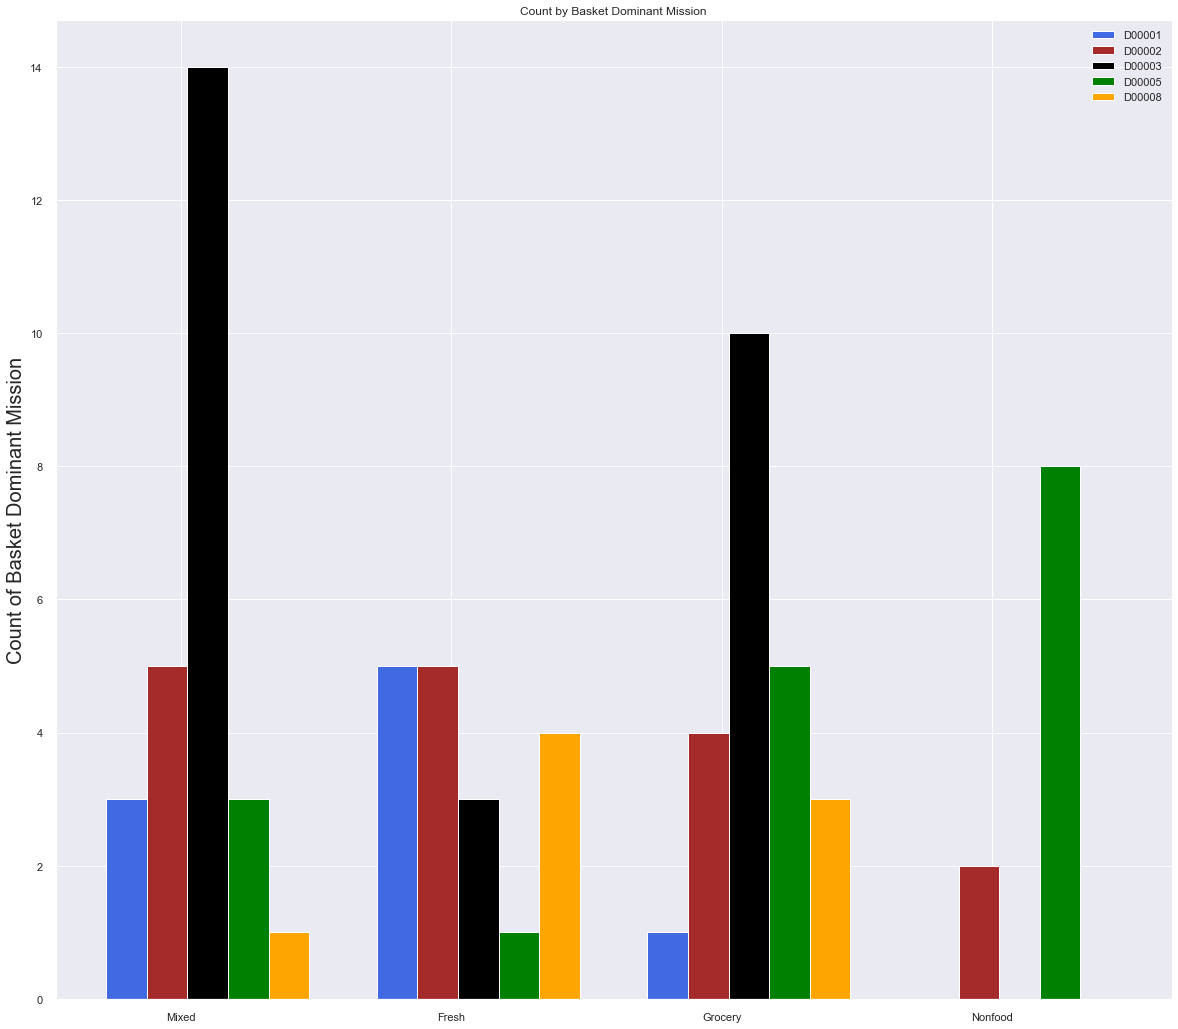

In [924]:
# plotting the graph
fig = plt.figure(figsize=(20,18))

ax = fig.add_subplot(111)

d00001_basket_dominant_mission_values = ax.bar(index, 
                                               d00001_basket_dominant_mission_list_of_values, width, color='royalblue')
d00002_basket_dominant_mission_values = ax.bar(index+width, 
                                               d00002_basket_dominant_mission_list_of_values, width, color='brown')
d00003_basket_dominant_mission_values = ax.bar(index+width+width, 
                                               d00003_basket_dominant_mission_list_of_values, width, color='black')
d00005_basket_dominant_mission_values = ax.bar(index+width+width+width, 
                                               d00005_basket_dominant_mission_list_of_values, width, color='green')
d00008_basket_dominant_mission_values = ax.bar(index+width+width+width+width, 
                                               d00008_basket_dominant_mission_list_of_values, width, color='orange')

ax.set_ylabel('Count of Basket Dominant Mission',fontdict={"fontsize":20})
ax.set_title('Count by Basket Dominant Mission')
ax.set_xticks(index + width + width / 3)
ax.set_xticklabels( ('Mixed', 'Fresh', 'Grocery', 'Nonfood') )


# Legend
ax.legend( (d00001_values[0], d00002_values[0], d00003_values[0], d00005_values[0], d00008_values[0]),
          ('D00001', 'D00002','D00003', 'D00005', 'D00008') )

**Store Code**

In [925]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
60,200607,2006-04-10,2,9,4,1820,PRD0904014,CL00240,DEP00086,G00028,D00008,NaN,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02
98,200607,2006-04-12,4,15,1,61,PRD0903650,CL00144,DEP00051,G00015,D00003,NaN,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03
15,200607,2006-04-14,6,15,1,75,PRD0900649,CL00140,DEP00049,G00014,D00003,CUST0000089820,LA,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01
55,200607,2006-04-10,2,9,1,217,PRD0901906,CL00081,DEP00023,G00007,D00002,NaN,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02
100,200607,2006-04-12,4,15,6,138,PRD0904743,CL00070,DEP00020,G00007,D00002,NaN,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03


In [926]:
store_code_df = supermarket_till_transactions_df.groupby(["STORE_CODE"]).size().reset_index(name="COUNT")
store_code_df

,STORE_CODE,COUNT
0,STORE00001,12
1,STORE00002,17
2,STORE00008,17
3,STORE00013,16
4,STORE00024,2
5,STORE00025,7
6,STORE00051,3
7,STORE00059,4
8,STORE00078,11
9,STORE00103,12


<font color="red">**NB** - The customer life stage is also imbalanced and needs to be addressed as such </font>

In [927]:
prod_code_40_by_store_code_df = supermarket_till_transactions_df[["PROD_CODE_40","STORE_CODE"]]
prod_code_40_by_store_code_df.sample(5)

,PROD_CODE_40,STORE_CODE
49,D00002,STORE00013
28,D00002,STORE00002
48,D00008,STORE00013
101,D00002,STORE00159
50,D00002,STORE00013


In [928]:
# Check for null values
prod_code_40_by_store_code_df.isnull().sum()

PROD_CODE_40    0
STORE_CODE      0
dtype: int64

In [929]:
prod_code_40_by_store_code_df.groupby(["PROD_CODE_40","STORE_CODE"]).size()

PROD_CODE_40  STORE_CODE
D00001        STORE00001     2
              STORE00008     4
              STORE00013     1
              STORE00051     1
              STORE00470     1
D00002        STORE00001     7
              STORE00002    10
              STORE00008     5
              STORE00013     7
              STORE00024     1
              STORE00025     6
              STORE00051     2
              STORE00059     1
              STORE00078     8
              STORE00103     7
              STORE00159     1
              STORE00470     1
              STORE01668     2
D00003        STORE00001     3
              STORE00002     6
              STORE00008     4
              STORE00013     4
              STORE00025     1
              STORE00059     2
              STORE00078     1
              STORE00103     5
              STORE02847     1
D00005        STORE00002     1
              STORE00008     4
              STORE00013     1
              STORE00059     1
              

In [930]:
prod_code_40_by_store_code_df = prod_code_40_by_store_code_df.groupby(["PROD_CODE_40","STORE_CODE"])
                .size().reset_index(name="COUNT")
prod_code_40_by_store_code_df

,PROD_CODE_40,STORE_CODE,COUNT
0,D00001,STORE00001,2
1,D00001,STORE00008,4
2,D00001,STORE00013,1
3,D00001,STORE00051,1
4,D00001,STORE00470,1
5,D00002,STORE00001,7
6,D00002,STORE00002,10
7,D00002,STORE00008,5
8,D00002,STORE00013,7
9,D00002,STORE00024,1


In [931]:
d00001_store_code_list = prod_code_40_by_store_code_df[prod_code_40_by_store_code_df["PROD_CODE_40"] == "D00001"]
d00002_store_code_list = prod_code_40_by_store_code_df[prod_code_40_by_store_code_df["PROD_CODE_40"] == "D00002"]
d00003_store_code_list = prod_code_40_by_store_code_df[prod_code_40_by_store_code_df["PROD_CODE_40"] == "D00003"]
d00005_store_code_list = prod_code_40_by_store_code_df[prod_code_40_by_store_code_df["PROD_CODE_40"] == "D00005"]
d00008_store_code_list = prod_code_40_by_store_code_df[prod_code_40_by_store_code_df["PROD_CODE_40"] == "D00008"]
d00003_store_code_list

,PROD_CODE_40,STORE_CODE,COUNT
18,D00003,STORE00001,3
19,D00003,STORE00002,6
20,D00003,STORE00008,4
21,D00003,STORE00013,4
22,D00003,STORE00025,1
23,D00003,STORE00059,2
24,D00003,STORE00078,1
25,D00003,STORE00103,5
26,D00003,STORE02847,1


In [932]:
# List of Values
d00001_store_code_list_count = d00001_store_code_list["COUNT"]
d00002_store_code_list_count = d00002_store_code_list["COUNT"]
d00003_store_code_list_count = d00003_store_code_list["COUNT"]
d00005_store_code_list_count = d00005_store_code_list["COUNT"]
d00008_store_code_list_count = d00008_store_code_list["COUNT"]
d00008_store_code_list_count

34    3
35    1
36    1
37    3
Name: COUNT, dtype: int64

In [933]:
# Check how many categories we have in customer life stage
prod_code_40_by_store_code_df["STORE_CODE"].value_counts()

STORE00013    5
STORE00008    4
STORE00078    3
STORE00002    3
STORE00059    3
STORE00001    3
STORE00470    3
STORE00051    2
STORE02847    2
STORE00103    2
STORE00024    2
STORE00025    2
STORE00159    1
STORE00288    1
STORE01668    1
STORE02451    1
Name: STORE_CODE, dtype: int64

In [934]:
# The number of customer life stage
N = 16

# Number of locations to plot
index = np.arange(N)

# width of plotting
width = 0.15

In [935]:
# Define the tupples
d00001_store_code_list_of_values = ([2,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0])
d00002_store_code_list_of_values = ([7,10,5,7,1,6,2,1,8,7,1,1,2,0,0,0])
d00003_store_code_list_of_values = ([3,6,4,4,1,2,1,5,1,0,0,0,0,0,0,0])
d00005_store_code_list_of_values = ([1,4,1,1,2,6,2,0,0,0,0,0,0,0,0,0])
d00008_store_code_list_of_values = ([3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0])
d00005_store_code_list_of_values

[1, 4, 1, 1, 2, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

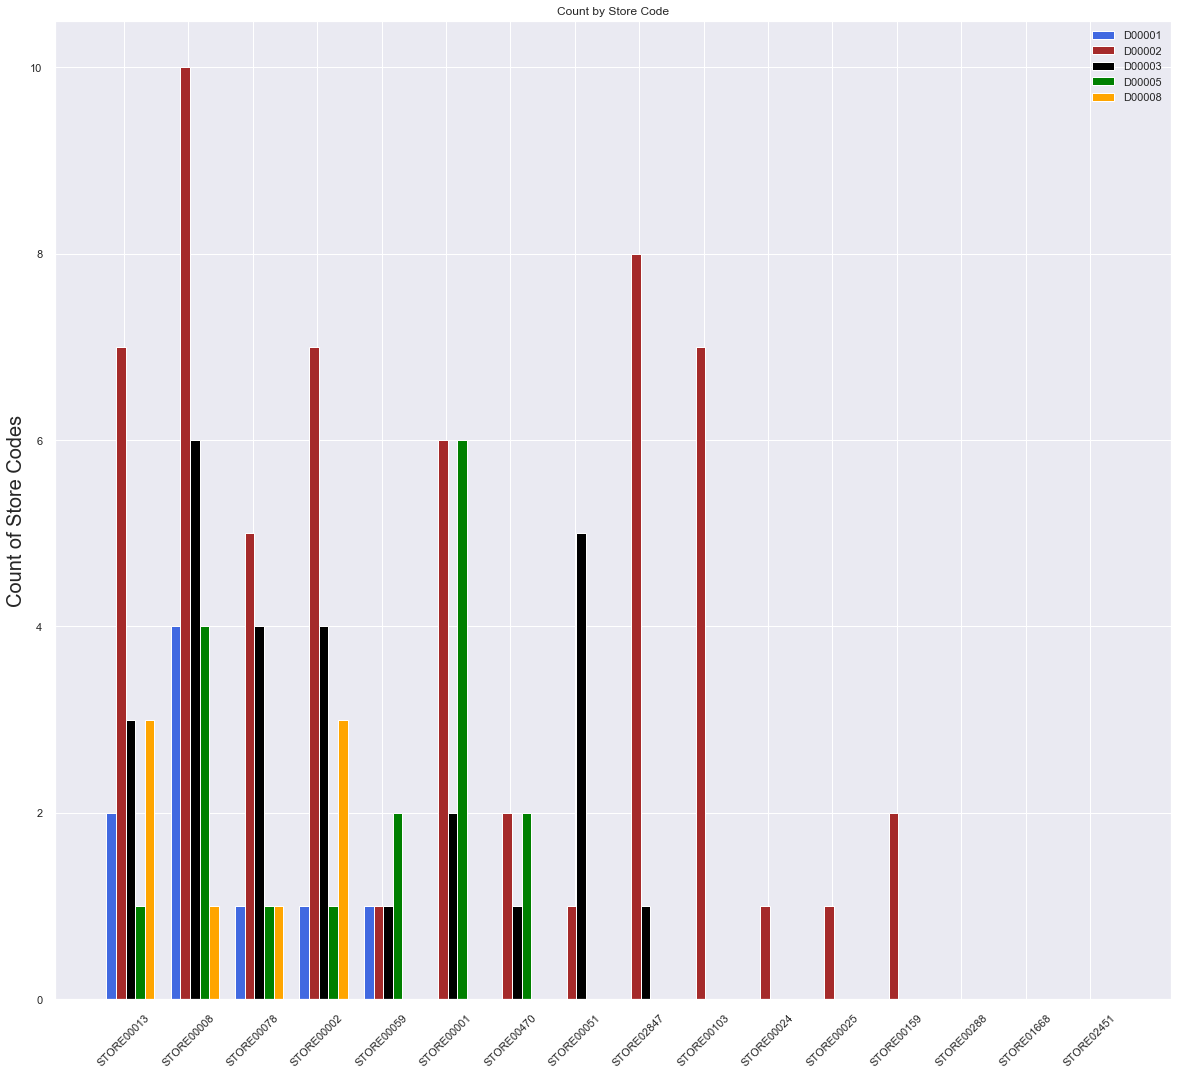

In [936]:
# plotting the graph

fig = plt.figure(figsize=(20,18))

ax = fig.add_subplot(111)

d00001_store_code_values = ax.bar(index, 
                                  d00001_store_code_list_of_values, width, color='royalblue')
d00002_store_code_values = ax.bar(index+width, 
                                  d00002_store_code_list_of_values, width, color='brown')
d00003_store_code_values = ax.bar(index+width+width, 
                                  d00003_store_code_list_of_values, width, color='black')
d00005_store_code_values = ax.bar(index+width+width+width, 
                                  d00005_store_code_list_of_values, width, color='green')
d00008_store_code_values = ax.bar(index+width+width+width+width, 
                                  d00008_store_code_list_of_values, width, color='orange')

ax.set_ylabel('Count of Store Codes',fontdict={"fontsize":20})
ax.set_title('Count by Store Code')
ax.set_xticks(index + width + width / 3)
ax.set_xticklabels( ('STORE00013', 'STORE00008', 'STORE00078', 'STORE00002','STORE00059','STORE00001',
                     'STORE00470','STORE00051','STORE02847','STORE00103','STORE00024','STORE00025','STORE00159',
                     'STORE00288','STORE01668','STORE02451'),rotation=45 )


# Legend
ax.legend( (d00001_values[0], d00002_values[0], d00003_values[0], d00005_values[0], d00008_values[0]),
          ('D00001', 'D00002','D00003', 'D00005', 'D00008') )

In [937]:
supermarket_till_transactions_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
102,200607,2006-04-12,4,12,3,273,PRD0900472,CL00198,DEP00067,G00021,D00005,CUST0000530875,MM,OF,994100100470269,L,UM,Top Up,Nonfood,STORE00288,LS,S03
69,200607,2006-04-12,4,20,1,38,PRD0903898,CL00070,DEP00020,G00007,D00002,NaN,NaN,NaN,994100100091691,M,MM,Small Shop,Fresh,STORE00025,XLS,S02
104,200607,2006-04-12,4,12,3,432,PRD0903335,CL00198,DEP00067,G00021,D00005,CUST0000530875,MM,OF,994100100470269,L,UM,Top Up,Nonfood,STORE00288,LS,S03
63,200607,2006-04-14,6,8,1,132,PRD0903757,CL00046,DEP00012,G00004,D00002,CUST0000141657,LA,OA,994100100237591,S,MM,Small Shop,Fresh,STORE00024,LS,W02
83,200607,2006-04-12,4,13,1,32,PRD0902540,CL00044,DEP00011,G00004,D00002,NaN,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01


In [938]:
model_df = supermarket_till_transactions_df[["SHOP_WEEKDAY","SHOP_HOUR","QUANTITY","SPEND","PROD_CODE",
                                             "PROD_CODE_10","PROD_CODE_20","PROD_CODE_30","PROD_CODE_40",
                                             "CUST_PRICE_SENSITIVITY","CUST_LIFESTAGE","BASKET_SIZE",
                                             "BASKET_PRICE_SENSITIVITY","BASKET_TYPE","BASKET_DOMINANT_MISSION",
                                             "STORE_CODE","STORE_FORMAT","STORE_REGION"]]
model_df.sample(5)

,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
71,6,16,1,63,PRD0902008,CL00018,DEP00005,G00003,D00001,LA,OA,M,LA,Small Shop,Fresh,STORE00051,MS,W02
117,6,19,1,154,PRD0901219,CL00160,DEP00054,G00016,D00003,LA,OA,M,MM,Small Shop,Grocery,STORE02847,LS,N01
99,4,15,1,164,PRD0904450,CL00156,DEP00053,G00016,D00003,NaN,NaN,L,LA,Top Up,Fresh,STORE00103,MS,N03
6,5,20,1,101,PRD0903074,CL00045,DEP00011,G00004,D00002,LA,YF,L,LA,Top Up,Fresh,STORE00001,LS,E02
95,4,15,1,151,PRD0903067,CL00067,DEP00019,G00007,D00002,NaN,NaN,L,LA,Top Up,Fresh,STORE00103,MS,N03


In [939]:
X=model_df[["SHOP_WEEKDAY","SHOP_HOUR","QUANTITY","SPEND","PROD_CODE","PROD_CODE_10","PROD_CODE_20",
            "PROD_CODE_30","CUST_PRICE_SENSITIVITY","CUST_LIFESTAGE","BASKET_SIZE","BASKET_PRICE_SENSITIVITY",
            "BASKET_TYPE","BASKET_DOMINANT_MISSION","STORE_CODE","STORE_FORMAT","STORE_REGION"]]  # Features
y=model_df["PROD_CODE_40"]  # Labels

In [940]:
#Fill the Null Spaces
X.fillna("XX",inplace=True)

In [941]:
X.sample(5)

,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
38,5,8,1,180,PRD0903321,CL00020,DEP00005,G00003,MM,OT,L,MM,Full Shop,Mixed,STORE00008,MS,N01
34,5,8,1,85,PRD0902265,CL00159,DEP00054,G00016,MM,OT,L,MM,Full Shop,Mixed,STORE00008,MS,N01
26,3,15,1,63,PRD0903052,CL00031,DEP00008,G00004,LA,OT,M,UM,Small Shop,Mixed,STORE00002,LS,W01
10,5,20,1,129,PRD0904257,CL00041,DEP00011,G00004,LA,YF,L,LA,Top Up,Fresh,STORE00001,LS,E02
42,5,8,1,122,PRD0904136,CL00007,DEP00003,G00002,MM,OT,L,MM,Full Shop,Mixed,STORE00008,MS,N01


In [942]:
# Encoding using Frequency Encoding
product_code_fe = X.groupby('PROD_CODE').size()/len(X)
X.loc[:,'PROD_CODE_FREQ_ENC'] = X['PROD_CODE'].map(product_code_fe)

In [943]:
product_code_10_fe = X.groupby('PROD_CODE_10').size()/len(X)
X.loc[:,'PROD_CODE_10_FREQ_ENC'] = X['PROD_CODE_10'].map(product_code_10_fe)

In [944]:
product_code_20_fe = X.groupby('PROD_CODE_20').size()/len(X)
X.loc[:,'PROD_CODE_20_FREQ_ENC'] = X['PROD_CODE_20'].map(product_code_20_fe)

In [945]:
product_code_30_fe = X.groupby('PROD_CODE_30').size()/len(X)
X.loc[:,'PROD_CODE_30_FREQ_ENC'] = X['PROD_CODE_30'].map(product_code_30_fe)

In [946]:
cust_price_sensitivity_fe = X.groupby('CUST_PRICE_SENSITIVITY').size()/len(X)
X.loc[:,'CUST_PRICE_SENSITIVITY_FREQ_ENC'] = X['CUST_PRICE_SENSITIVITY'].map(cust_price_sensitivity_fe)

In [947]:
cust_lifestage_fe = X.groupby('CUST_LIFESTAGE').size()/len(X)
X.loc[:,'CUST_LIFESTAGE_FREQ_ENC'] = X['CUST_LIFESTAGE'].map(cust_lifestage_fe)

In [948]:
basket_size_fe = X.groupby('BASKET_SIZE').size()/len(X)
X.loc[:,'BASKET_SIZE_FREQ_ENC'] = X['BASKET_SIZE'].map(basket_size_fe)

In [949]:
basket_price_sensitivity_fe = X.groupby('BASKET_PRICE_SENSITIVITY').size()/len(X)
X.loc[:,'BASKET_PRICE_SENSITIVITY_FREQ_ENC'] = X['BASKET_PRICE_SENSITIVITY'].map(basket_price_sensitivity_fe)

In [950]:
basket_type_fe = X.groupby('BASKET_TYPE').size()/len(X)
X.loc[:,'BASKET_TYPE_FREQ_ENC'] = X['BASKET_TYPE'].map(basket_type_fe)

In [951]:
basket_dominant_mission_fe = X.groupby('BASKET_DOMINANT_MISSION').size()/len(X)
X.loc[:,'BASKET_DOMINANT_MISSION_FREQ_ENC'] = X['BASKET_DOMINANT_MISSION'].map(basket_dominant_mission_fe)

In [952]:
store_code_fe = X.groupby('STORE_CODE').size()/len(X)
X.loc[:,'STORE_CODE_FREQ_ENC'] = X['STORE_CODE'].map(store_code_fe)

In [953]:
store_format_fe = X.groupby('STORE_FORMAT').size()/len(X)
X.loc[:,'STORE_FORMAT_FREQ_ENC'] = X['STORE_FORMAT'].map(store_format_fe)

In [954]:
store_region_fe = X.groupby('STORE_REGION').size()/len(X)
X.loc[:,'STORE_REGION_FREQ_ENC'] = X['STORE_REGION'].map(store_region_fe)

In [955]:
# Drop the PROD_CODE Column
X.drop(columns=["PROD_CODE"],inplace=True)
X.drop(columns=["PROD_CODE_10"],inplace=True)
X.drop(columns=["PROD_CODE_20"],inplace=True)
X.drop(columns=["PROD_CODE_30"],inplace=True)
X.drop(columns=["CUST_PRICE_SENSITIVITY"],inplace=True)
X.drop(columns=["CUST_LIFESTAGE"],inplace=True)
X.drop(columns=["BASKET_SIZE"],inplace=True)
X.drop(columns=["BASKET_PRICE_SENSITIVITY"],inplace=True)
X.drop(columns=["BASKET_TYPE"],inplace=True)
X.drop(columns=["BASKET_DOMINANT_MISSION"],inplace=True)
X.drop(columns=["STORE_CODE"],inplace=True)
X.drop(columns=["STORE_FORMAT"],inplace=True)
X.drop(columns=["STORE_REGION"],inplace=True)

In [956]:
X.sample(5)

,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE_FREQ_ENC,PROD_CODE_10_FREQ_ENC,PROD_CODE_20_FREQ_ENC,PROD_CODE_30_FREQ_ENC,CUST_PRICE_SENSITIVITY_FREQ_ENC,CUST_LIFESTAGE_FREQ_ENC,BASKET_SIZE_FREQ_ENC,BASKET_PRICE_SENSITIVITY_FREQ_ENC,BASKET_TYPE_FREQ_ENC,BASKET_DOMINANT_MISSION_FREQ_ENC,STORE_CODE_FREQ_ENC,STORE_FORMAT_FREQ_ENC,STORE_REGION_FREQ_ENC
24,3,15,1,35,0.008403,0.016807,0.016807,0.033613,0.352941,0.319328,0.252101,0.361345,0.268908,0.310924,0.142857,0.621849,0.142857
36,5,8,1,135,0.008403,0.025210,0.033613,0.252101,0.226891,0.319328,0.697479,0.302521,0.277311,0.310924,0.142857,0.302521,0.176471
107,4,12,3,498,0.008403,0.008403,0.016807,0.042017,0.226891,0.050420,0.697479,0.361345,0.453782,0.075630,0.050420,0.621849,0.067227
104,4,12,3,432,0.008403,0.033613,0.100840,0.100840,0.226891,0.050420,0.697479,0.361345,0.453782,0.075630,0.050420,0.621849,0.067227
73,6,16,3,69,0.016807,0.050420,0.067227,0.252101,0.352941,0.092437,0.252101,0.336134,0.268908,0.537815,0.025210,0.302521,0.075630


In [957]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [958]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [960]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


In [962]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      D00001       0.50      1.00      0.67         2
      D00002       1.00      0.94      0.97        17
      D00003       1.00      0.70      0.82        10
      D00005       0.71      1.00      0.83         5
      D00008       1.00      1.00      1.00         2

    accuracy                           0.89        36
   macro avg       0.84      0.93      0.86        36
weighted avg       0.93      0.89      0.90        36



In [965]:
# confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

,0,1,2,3,4
0,2,0,0,0,0
1,1,16,0,0,0
2,1,0,7,2,0
3,0,0,0,5,0
4,0,0,0,0,2


### Problem #2 : Predict how much a customer is likely to spend

1. When they are likely to spend the amount
2. How many items are they likely to purchase

In [669]:
baskets_df = supermarket_till_transactions_df.groupby(['CUST_CODE','BASKET_ID','BASKET_PRICE_SENSITIVITY','SPEND'])
.size().reset_index().groupby('BASKET_ID')['CUST_CODE','BASKET_PRICE_SENSITIVITY','SPEND'].sum().reset_index()
baskets_df

,BASKET_ID,SPEND
0,994100100014637,6127
1,994100100058515,1321
2,994100100088144,1490
3,994100100091691,626
4,994100100206797,1807
5,994100100206798,278
6,994100100237590,729
7,994100100237591,1351
8,994100100398404,3041
9,994100100470269,2186


In [572]:
# Get the customer baskets
baskets_by_customers_df = supermarket_till_transactions_df.groupby(['BASKET_ID','CUST_CODE']).size()
.reset_index(name='COUNT_OF_ITEMS')
baskets_by_customers_df

,BASKET_ID,CUST_CODE,COUNT_OF_ITEMS
0,994100100014637,Unknown Customer Code,16
1,994100100058515,Unknown Customer Code,11
2,994100100088144,Unknown Customer Code,12
3,994100100091691,Unknown Customer Code,7
4,994100100206797,CUST0000089820,13
5,994100100206798,CUST0000089820,4
6,994100100237590,CUST0000141657,1
7,994100100237591,CUST0000141657,2
8,994100100398404,CUST0000410932,17
9,994100100470269,CUST0000530875,6


In [573]:
# Merge the dataframes
dataframes = [baskets_df,baskets_by_customers_df]
customer_baskets_df = pd.concat(dataframes,axis=1).reindex(baskets_df.index)
customer_baskets_df

,BASKET_ID,SPEND,BASKET_ID,CUST_CODE,COUNT_OF_ITEMS
0,994100100014637,6127,994100100014637,Unknown Customer Code,16
1,994100100058515,1321,994100100058515,Unknown Customer Code,11
2,994100100088144,1490,994100100088144,Unknown Customer Code,12
3,994100100091691,626,994100100091691,Unknown Customer Code,7
4,994100100206797,1807,994100100206797,CUST0000089820,13
5,994100100206798,278,994100100206798,CUST0000089820,4
6,994100100237590,729,994100100237590,CUST0000141657,1
7,994100100237591,1351,994100100237591,CUST0000141657,2
8,994100100398404,3041,994100100398404,CUST0000410932,17
9,994100100470269,2186,994100100470269,CUST0000530875,6


In [574]:
# Get the customer baskets
baskets_by_dates_df = supermarket_till_transactions_df.groupby(['BASKET_ID','SHOP_DATE']).size()
        .reset_index(name='COUNT_OF_ITEMS')
baskets_by_dates_df

,BASKET_ID,SHOP_DATE,COUNT_OF_ITEMS
0,994100100014637,2006-04-10,16
1,994100100058515,2006-04-12,11
2,994100100088144,2006-04-12,12
3,994100100091691,2006-04-12,7
4,994100100206797,2006-04-14,13
5,994100100206798,2006-04-11,4
6,994100100237590,2006-04-10,1
7,994100100237591,2006-04-14,2
8,994100100398404,2006-04-13,17
9,994100100470269,2006-04-12,6


In [575]:
# Drop the count_of_items columns
baskets_by_dates_df.drop(columns=['COUNT_OF_ITEMS'], inplace=True)

In [576]:
# Merge the dataframes
dataframes_2 = [customer_baskets_df,baskets_by_dates_df]
customer_baskets_by_date_df = pd.concat(dataframes_2,axis=1).reindex(customer_baskets_df.index)
customer_baskets_by_date_df

,BASKET_ID,SPEND,BASKET_ID,CUST_CODE,COUNT_OF_ITEMS,BASKET_ID,SHOP_DATE
0,994100100014637,6127,994100100014637,Unknown Customer Code,16,994100100014637,2006-04-10
1,994100100058515,1321,994100100058515,Unknown Customer Code,11,994100100058515,2006-04-12
2,994100100088144,1490,994100100088144,Unknown Customer Code,12,994100100088144,2006-04-12
3,994100100091691,626,994100100091691,Unknown Customer Code,7,994100100091691,2006-04-12
4,994100100206797,1807,994100100206797,CUST0000089820,13,994100100206797,2006-04-14
5,994100100206798,278,994100100206798,CUST0000089820,4,994100100206798,2006-04-11
6,994100100237590,729,994100100237590,CUST0000141657,1,994100100237590,2006-04-10
7,994100100237591,1351,994100100237591,CUST0000141657,2,994100100237591,2006-04-14
8,994100100398404,3041,994100100398404,CUST0000410932,17,994100100398404,2006-04-13
9,994100100470269,2186,994100100470269,CUST0000530875,6,994100100470269,2006-04-12


In [672]:
shopping_df = customer_baskets_by_date_df[["SHOP_DATE","CUST_CODE","BASKET_ID","COUNT_OF_ITEMS","SPEND"]]
shopping_df

,SHOP_DATE,CUST_CODE,BASKET_ID,BASKET_ID,BASKET_ID,COUNT_OF_ITEMS,SPEND
0,2006-04-10,Unknown Customer Code,994100100014637,994100100014637,994100100014637,16,6127
1,2006-04-12,Unknown Customer Code,994100100058515,994100100058515,994100100058515,11,1321
2,2006-04-12,Unknown Customer Code,994100100088144,994100100088144,994100100088144,12,1490
3,2006-04-12,Unknown Customer Code,994100100091691,994100100091691,994100100091691,7,626
4,2006-04-14,CUST0000089820,994100100206797,994100100206797,994100100206797,13,1807
5,2006-04-11,CUST0000089820,994100100206798,994100100206798,994100100206798,4,278
6,2006-04-10,CUST0000141657,994100100237590,994100100237590,994100100237590,1,729
7,2006-04-14,CUST0000141657,994100100237591,994100100237591,994100100237591,2,1351
8,2006-04-13,CUST0000410932,994100100398404,994100100398404,994100100398404,17,3041
9,2006-04-12,CUST0000530875,994100100470269,994100100470269,994100100470269,6,2186


In [674]:
# Remove Duplicated Columns
shopping_df = shopping_df.loc[:,~shopping_df.columns.duplicated()]
shopping_df

,SHOP_DATE,CUST_CODE,BASKET_ID,COUNT_OF_ITEMS,SPEND
0,2006-04-10,Unknown Customer Code,994100100014637,16,6127
1,2006-04-12,Unknown Customer Code,994100100058515,11,1321
2,2006-04-12,Unknown Customer Code,994100100088144,12,1490
3,2006-04-12,Unknown Customer Code,994100100091691,7,626
4,2006-04-14,CUST0000089820,994100100206797,13,1807
5,2006-04-11,CUST0000089820,994100100206798,4,278
6,2006-04-10,CUST0000141657,994100100237590,1,729
7,2006-04-14,CUST0000141657,994100100237591,2,1351
8,2006-04-13,CUST0000410932,994100100398404,17,3041
9,2006-04-12,CUST0000530875,994100100470269,6,2186


### Predict Sales By Day

1. How much is the supermarket likely to collect on a daily basis for the next one month
2. How much is a supermarket branch more likely to collect on a daily basis for the next one month
3. What quantity of items are most likely to be sold each day by each branch

In [675]:
# sales by day
sales_by_dates_df = shopping_df.groupby(['SHOP_DATE','SPEND']).size().reset_index()
.groupby('SHOP_DATE')['SHOP_DATE','SPEND'].sum().reset_index()
sales_by_dates_df

,SHOP_DATE,SPEND
0,2006-04-10,6856
1,2006-04-11,1139
2,2006-04-12,6546
3,2006-04-13,4596
4,2006-04-14,5032


In [698]:
# sales by day by
sales_by_branch_df = supermarket_till_transactions_df.groupby(['SHOP_DATE','STORE_CODE','SPEND']).size()
.reset_index(name='COUNT_OF_ITEMS')
branch_sales_by_date_df = sales_by_branch_df.groupby(['SHOP_DATE','STORE_CODE']).sum().reset_index()
branch_sales_by_date_df = branch_sales_by_date_df[["SHOP_DATE","STORE_CODE","COUNT_OF_ITEMS","SPEND"]]
branch_sales_by_date_df

,SHOP_DATE,STORE_CODE,COUNT_OF_ITEMS,SPEND
0,2006-04-10,STORE00013,16,6127
1,2006-04-10,STORE02451,1,729
2,2006-04-11,STORE00002,4,278
3,2006-04-11,STORE00059,4,630
4,2006-04-11,STORE00470,3,231
5,2006-04-12,STORE00001,4,906
6,2006-04-12,STORE00025,7,626
7,2006-04-12,STORE00078,11,1321
8,2006-04-12,STORE00103,12,1490
9,2006-04-12,STORE00159,1,17


In [695]:
supermarket_till_transactions_df[supermarket_till_transactions_df["STORE_CODE"] == "STORE00013"]

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,REGISTRATION_STATUS
46,200607,2006-04-10,2,9,1,52,PRD0900024,CL00160,DEP00054,G00016,D00003,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
47,200607,2006-04-10,2,9,1,277,PRD0900486,CL00034,DEP00009,G00004,D00002,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
48,200607,2006-04-10,2,9,1,456,PRD0900636,CL00245,DEP00088,G00029,D00008,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
49,200607,2006-04-10,2,9,1,391,PRD0900782,CL00086,DEP00024,G00007,D00002,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
50,200607,2006-04-10,2,9,1,125,PRD0901020,CL00049,DEP00012,G00004,D00002,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
51,200607,2006-04-10,2,9,1,192,PRD0901175,CL00049,DEP00012,G00004,D00002,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
52,200607,2006-04-10,2,9,3,357,PRD0901569,CL00151,DEP00052,G00015,D00003,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
53,200607,2006-04-10,2,9,1,188,PRD0901691,CL00205,DEP00069,G00022,D00005,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
54,200607,2006-04-10,2,9,1,146,PRD0901882,CL00048,DEP00012,G00004,D00002,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
55,200607,2006-04-10,2,9,1,217,PRD0901906,CL00081,DEP00023,G00007,D00002,Unknown Customer Code,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,NOT REGISTERED
